# Predicting All-NBA Team and Player Salaries - Preliminary EDA
---

In this notebook, we will conduct a brief exploratory data analysis of our cleaned data NBA player/team data. During our data processing and cleaning, we organized player-level statistics of three types (per-game, totals, and advanced) and incorporated team ranking data and awards.

We will focus our exploration around All-NBA Team voter share and player salaries, separately and in relation to each other. This exploration will serve to get a general sense to the makeup of the data and relationships between variables that may help derive additional insights during modeling.

Further detailed notebooks on the various segments of this project can be found at the following: 
- [01_Data_Acquisition](./01_Data_Acquisition.ipynb)
- [02_Data_Cleaning](./02_Data_Cleaning.ipynb)
- [04_Data_Modeling_I](./04_Data_Modeling_I.ipynb)
- [05_Data_Modeling_II](./05_Data_Modeling_II.ipynb)

For more information on the background, a summary of methods, and findings, please see the associated [README](../README.md) for this analysis. 

## Contents
- [I. Exploring Statistics and Data Composition](#I.-Exploring-Statistics-and-Data-Composition)
    - [Age Distributions](#Age-Distributions)
    - [Championship Count](#Championship-Count)
    - [Statistics Correlation Matrices](#Statistics-Correlation-Matrices)
    - [Variable Associations](#Variable-Associations)
- [II. All-NBA Winner Exploration](#II.-All-NBA-Winner-Exploration)
    - [PER, PPG, VORP by Position](#PER,-PPG,-VORP-by-Position)
    - [PER and TS% by Position Among Winners](#PER-and-TS%-by-Position-Among-Winners)
    - [PER and BPM Comparison Among 1st, 2nd, & 3rd Team](#PER-and-BPM-Comparison-Among-1st,-2nd,-&-3rd-Team)
    - [Win Share by PER, VORP, & BPM](#Win-Share-by-PER,-VORP,-&-BPM)
    - [Players With Most Selections](#Players-With-Most-Selections)
- [III. Salary Information Exploration](#III.-Salary-Information-Exploration)
    - [Salary Distributions Across Years](#Salary-Distributions-Across-Years)
    - [Salary Cap vs. Team Payroll](#Salary-Cap-vs.-Team-Payroll)
    - [Salary Cap Differential: Amount Spent Above/Below the Salary Cap](#Salary-Cap-Differential:-Amount-Spent-Above/Below-the-Salary-Cap)
    - [Salary Cap Differential by Win Percentage](#Salary-Cap-Differential-by-Win-Percentage)
    - [Salary Distribution by All-NBA Selection](#Salary-Distribution-by-All-NBA-Selection)
    - [PER by Salary and All-NBA Selection](#PER-by-Salary-and-All-NBA-Selection)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

pd.options.display.max_rows = 400
pd.options.display.max_columns = 400

In [2]:
stats = pd.read_csv('../data/clean/stats_main.csv')
stats['all_nba_winner'] = stats['all_nba_winner'].astype(int)
stats.describe()

age            g        pg_gs        pg_mp        pg_fg  \
count  4396.000000  4396.000000  4396.000000  4396.000000  4396.000000   
mean     26.936533    71.192448    61.334167    32.179026     5.791470   
std       3.880387    10.763495    20.093559     3.899013     1.781479   
min      19.000000    17.000000     0.000000    20.000000     1.900000   
25%      24.000000    65.000000    51.000000    29.000000     4.500000   
50%      27.000000    75.000000    67.000000    32.000000     5.500000   
75%      30.000000    80.000000    78.000000    35.000000     6.900000   
max      40.000000    85.000000    83.000000    43.000000    12.700000   

            pg_fga       pg_fg%        pg_3p       pg_3pa       pg_3p%  \
count  4396.000000  4396.000000  4396.000000  4396.000000  4396.000000   
mean     12.464559     0.466201     1.012511     2.797634     0.291951   
std       3.711232     0.047969     0.889224     2.306277     0.139365   
min       3.700000     0.348000     0.000000     0.000000     0.000000   
25%       9.675000     0.433000     0.100000     0.400000     0.257000   
50%      12.000000     0.460000     0.900000     2.700000     0.339000   
75%      15.000000     0.492000     1.600000     4.400000     0.379000   
max      27.800000     0.736000     5.300000    13.200000     1.000000   

             pg_2p       pg_2pa       pg_2p%      pg_efg%        pg_ft  \
count  4396.000000  4396.000000  4396.000000  4396.000000  4396.000000   
mean      4.779572     9.667152     0.494171     0.506812     3.018949   
std       1.846656     3.592557     0.047656     0.043549     1.567083   
min       0.700000     1.100000     0.356000     0.386000     0.200000   
25%       3.400000     7.100000     0.462000     0.478000     1.900000   
50%       4.600000     9.300000     0.489000     0.502000     2.700000   
75%       5.900000    11.900000     0.519000     0.532000     3.800000   
max      12.100000    23.400000     0.738000     0.736000    10.200000   

            pg_fta       pg_ft%       pg_orb       pg_drb       pg_trb  \
count  4396.000000  4396.000000  4396.000000  4396.000000  4396.000000   
mean      3.900136     0.772956     1.482734     4.302093     5.783826   
std       1.962983     0.086373     1.009531     1.905091     2.729884   
min       0.300000     0.309000     0.100000     1.100000     1.400000   
25%       2.500000     0.730000     0.700000     2.800000     3.600000   
50%       3.500000     0.786000     1.200000     3.900000     5.100000   
75%       4.900000     0.833000     2.200000     5.400000     7.500000   
max      13.100000     0.981000     6.800000    12.300000    18.700000   

            pg_ast       pg_stl       pg_blk       pg_tov        pg_pf  \
count  4396.000000  4396.000000  4396.000000  4396.000000  4396.000000   
mean      3.537307     1.089786     0.651137     2.067266     2.490264   
std       2.198596     0.440537     0.638030     0.729252     0.604097   
min       0.300000     0.200000     0.000000     0.500000     0.900000   
25%       1.900000     0.800000     0.200000     1.500000     2.100000   
50%       2.900000     1.000000     0.400000     2.000000     2.500000   
75%       4.800000     1.400000     0.800000     2.500000     2.900000   
max      14.200000     3.000000     4.500000     5.700000     4.500000   

            pg_pts         year       tot_gs       tot_mp       tot_fg  \
count  4396.000000  4396.000000  4396.000000  4396.000000  4396.000000   
mean     15.615105  2006.227025    61.334167  2326.588262   411.847589   
std       5.023321     9.525266    20.093559   472.518155   140.815968   
min       4.700000  1990.000000     0.000000   668.000000    67.000000   
25%      11.900000  1998.000000    51.000000  2015.000000   307.000000   
50%      14.800000  2006.000000    67.000000  2325.000000   392.000000   
75%      18.625000  2014.000000    78.000000  2673.250000   497.000000   
max      36.100000  2022.000000    83.000000  3533.000000   992.000000   

           to

In [3]:
stats['all_nba_winner2'] = stats['all_nba_winner'].map({1 : '1st Team', 2: '2nd Team', 3: '3rd Team'})
stats['all_nba_winner3'] = stats['all_nba_winner'].map({1 : '1st Team', 2: '2nd Team', 3: '3rd Team', 4: 'None', 0: 'None'})

---
## I. Exploring Statistics and Data Composition

### Age Distributions

In [4]:
avg_age = stats.groupby('year')['age'].agg(['mean', 'min', 'max']).reset_index().rename(columns={'mean':'avg_age', 'min': 'min_age', 'max' : 'max_age'})

In [5]:
avg_pts = stats.groupby('year')['pg_pts'].agg(['mean', 'min', 'max']).reset_index().rename(columns={'mean':'avg_pts', 'min': 'min_pts', 'max' : 'max_pts'})

In [6]:
avg_3s = stats.groupby('year')['pg_3pa'].agg(['mean', 'min', 'max']).reset_index().rename(columns={'mean':'avg_3s', 'min': 'min_3s', 'max' : 'max_3s'})

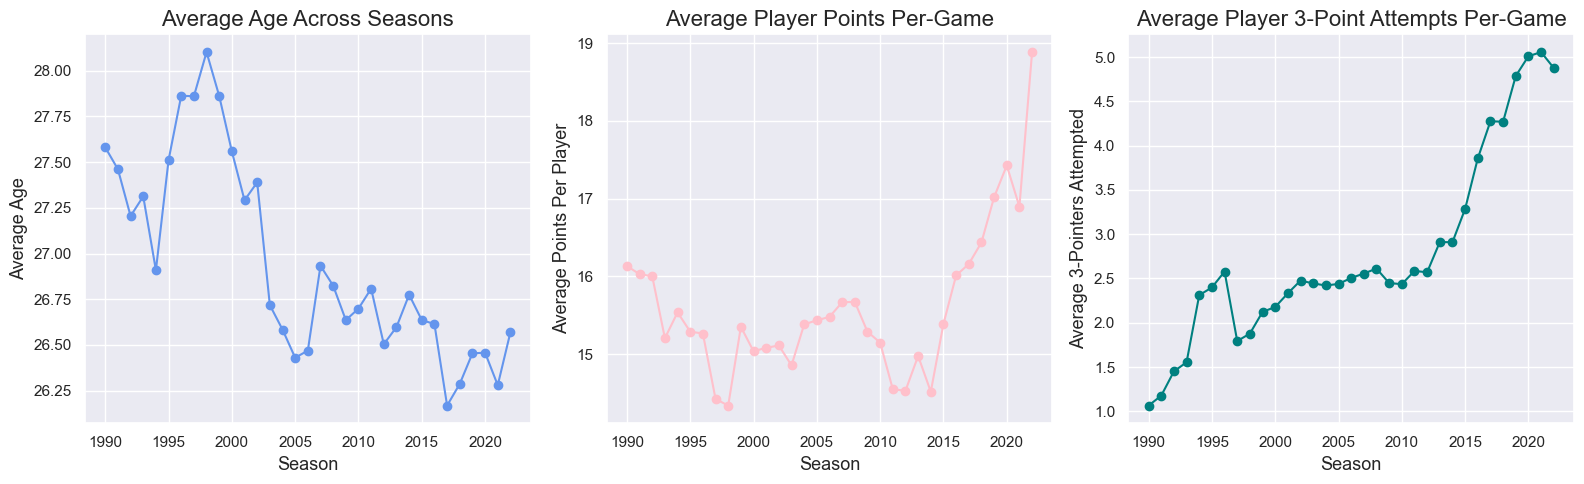

In [7]:
sns.set(style="darkgrid")

fig, ax = plt.subplots(1,3, figsize=(16,5))
seasons = avg_age['year']
mean_age = avg_age['avg_age']
#mini = avg_age['min_age']
#maxi = avg_age['max_age']
mean_pts = avg_pts['avg_pts']
mean_3s = avg_3s['avg_3s']

ax[0].plot(seasons, mean_age, marker = 'o', label = 'Average Age', color = 'cornflowerblue')
#plt.fill_between(seasons, mini, maxi, alpha=0.3, color='lightblue', label='Min-Max Range')
ax[0].set_title('Average Age Across Seasons', fontsize=16)
ax[0].set_xlabel('Season', fontsize=13)
ax[0].set_ylabel('Average Age', fontsize=13)

ax[1].plot(seasons, mean_pts, marker = 'o', label = 'Average Points', color = 'pink')
#plt.fill_between(seasons, mini, maxi, alpha=0.3, color='lightblue', label='Min-Max Range')
ax[1].set_title('Average Player Points Per-Game', fontsize=16)
ax[1].set_xlabel('Season', fontsize=13)
ax[1].set_ylabel('Average Points Per Player', fontsize=13);

ax[2].plot(seasons, mean_3s, marker = 'o', label = 'Average Per-Game 3-Pointers Attempted', color = 'teal')
#plt.fill_between(seasons, mini, maxi, alpha=0.3, color='lightblue', label='Min-Max Range')
ax[2].set_title('Average Player 3-Point Attempts Per-Game', fontsize=16)
ax[2].set_xlabel('Season', fontsize=13)
ax[2].set_ylabel('Average 3-Pointers Attempted', fontsize=13)

plt.tight_layout()
plt.savefig('../images/linechart_avg_age.png', dpi=300, bbox_inches='tight')

plt.show();

##### <span style = 'color:mediumvioletred'> _As the NBA has evolved across seasons, average player age is getting younger, and points are increasing. This may be attributed to growing popularity and changes in game style with time. Skill levels, coaching strategies, and the entertainment aspect of the game may all attribute to these changes over time._ </span>

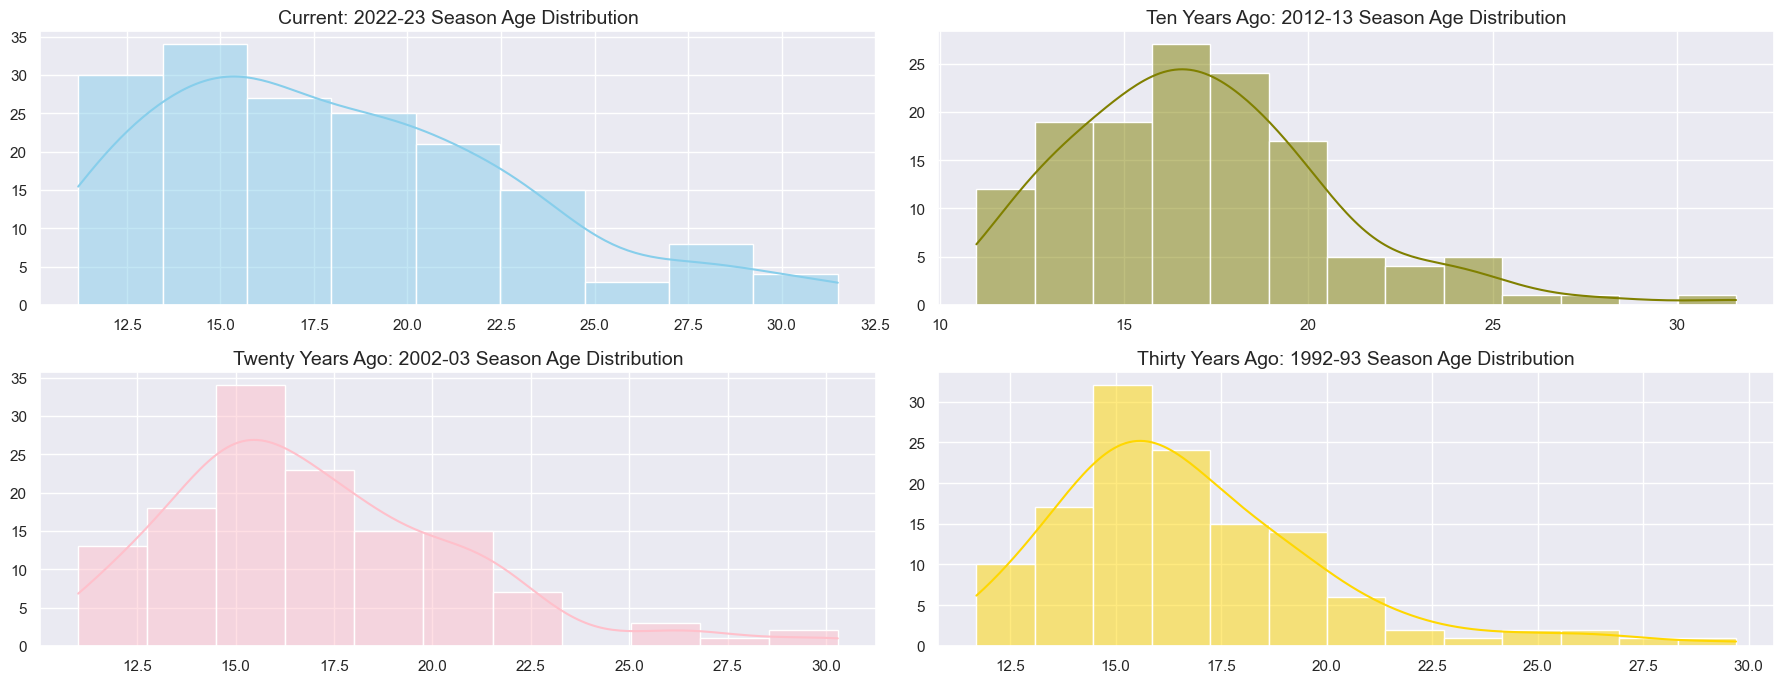

In [8]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(18, 7))

thirty_yrs = stats[stats.year == 1992]
twenty_yrs = stats[stats.year == 2002]
ten_yrs = stats[stats.year == 2012]
current = stats[stats.year == 2022]

sns.histplot(data=current, x="adv_per", kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=ten_yrs, x="adv_per", kde=True, color="olive", ax=axs[0,1])
sns.histplot(data=twenty_yrs, x="adv_per", kde=True, color="pink", ax=axs[1,0])
sns.histplot(data=thirty_yrs, x="adv_per", kde=True, color="gold", ax=axs[1,1])

axs[0,0].set_title('Current: 2022-23 Season Age Distribution', fontsize=14)
axs[0,1].set_title('Ten Years Ago: 2012-13 Season Age Distribution', fontsize=14)
axs[1,0].set_title('Twenty Years Ago: 2002-03 Season Age Distribution', fontsize=14)
axs[1,1].set_title('Thirty Years Ago: 1992-93 Season Age Distribution', fontsize=14)

for ax in axs.flat:
    ax.set(xlabel='', ylabel='')
    
plt.tight_layout()
plt.savefig('../images/histogram_age_over_yrs.png', dpi=300, bbox_inches='tight')

plt.show()

##### <span style = 'color:mediumvioletred'> _Thirty years ago, there were fewer inefficient players compared to current day. However there appear to be a larger number of higher efficiency players today as well._ </span>

### Championship Count

In [9]:
# How many times has each team won

win_cnt1 = stats.groupby('year')['champs'].first().reset_index().champs.value_counts().reset_index(name='count').rename(columns={'index': 'champs'})

In [10]:
# Want to add more years
data = [
    (1949, 'Los Angeles Lakers'), # Were the Minneapolis Lakers at this time, included as wins in Lakers franchise history
    (1950, 'Los Angeles Lakers'), # Minneapolis Lakers
    (1951, 'Rochester Royals'), 
    (1952, 'Los Angeles Lakers'), # Minneapolis Lakers
    (1953, 'Los Angeles Lakers'), # Minneapolis Lakers
    (1954, 'Los Angeles Lakers'), # Minneapolis Lakers
    (1955, 'Syracuse Nationals'),
    (1956, 'Golden State Warriors'), # Were the Philadelphia Warriors at this time, included as wins in Warriors franchise history
    (1957, 'Boston Celtics'),
    (1958, 'Atlanta Hawks'), # Were the St. Louis Hawks at this time, included as wins in Hawks franchise history
    (1959, 'Boston Celtics'),
    (1960, 'Boston Celtics'),
    (1961, 'Boston Celtics'),
    (1962, 'Boston Celtics'),
    (1963, 'Boston Celtics'),
    (1964, 'Boston Celtics'),
    (1965, 'Boston Celtics'),
    (1966, 'Boston Celtics'),
    (1967, 'Philadelphia 76ers'),
    (1968, 'Boston Celtics'),
    (1969, 'Boston Celtics'),
    (1970, 'New York Knicks'),
    (1971, 'Milwaukee Bucks'),
    (1972, 'Los Angeles Lakers'),
    (1973, 'New York Knicks'),
    (1974, 'Boston Celtics'),
    (1975, 'Golden State Warriors'),
    (1976, 'Boston Celtics'),
    (1977, 'Portland Trail Blazers'),
    (1978, 'Washington Wizards'), # Were the Washington Bullets at this time, included as wins in DCs franchise history
    (1979, 'Seattle SuperSonics'),
    (1980, 'Los Angeles Lakers'),
    (1981, 'Boston Celtics'),
    (1982, 'Los Angeles Lakers'),
    (1983, 'Philadelphia 76ers'),
    (1984, 'Boston Celtics'),
    (1985, 'Los Angeles Lakers'),
    (1986, 'Boston Celtics'),
    (1987, 'Los Angeles Lakers'),
    (1988, 'Los Angeles Lakers'),
    (1989, 'Detroit Pistons')
]

In [11]:
data = pd.DataFrame(data, columns = ['year', 'champs'])
win_cnt2 = data.groupby('year')['champs'].first().reset_index().champs.value_counts().reset_index(name='count').rename(columns={'index': 'champs'})

In [12]:
teams = pd.concat([win_cnt1, win_cnt2], axis=0).sort_values(by='count', ascending=False)
teams = teams.groupby('champs').sum().reset_index().sort_values(by='count', ascending=False)
teams.head()

champs  count
9      Los Angeles Lakers     17
1          Boston Celtics     17
2           Chicago Bulls      6
7   Golden State Warriors      6
16      San Antonio Spurs      5

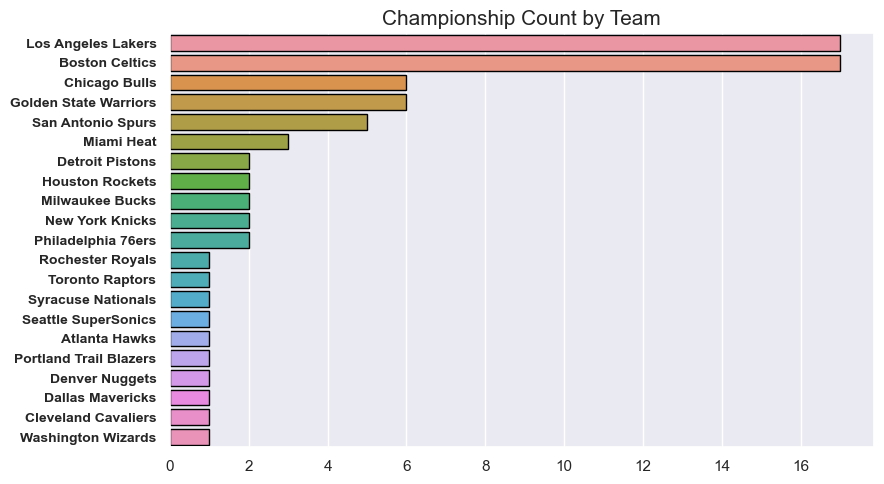

In [13]:
plt.figure(figsize = (9,5))
sns.barplot(teams, x='count', y='champs', orient = 'h', edgecolor = 'black')

plt.title('Championship Count by Team', fontsize=15)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('../images/barplot_champ_cnt.png', dpi=300, bbox_inches='tight')

plt.show();

##### <span style = 'color:mediumvioletred'> _The Lakers and the Celtics have most championship wins in NBA franchise history, with 17 each. The Bulls and the Warriors, the next highest, have a 1/3 as many franchise wins._ </span>

### Statistics Correlation Matrices

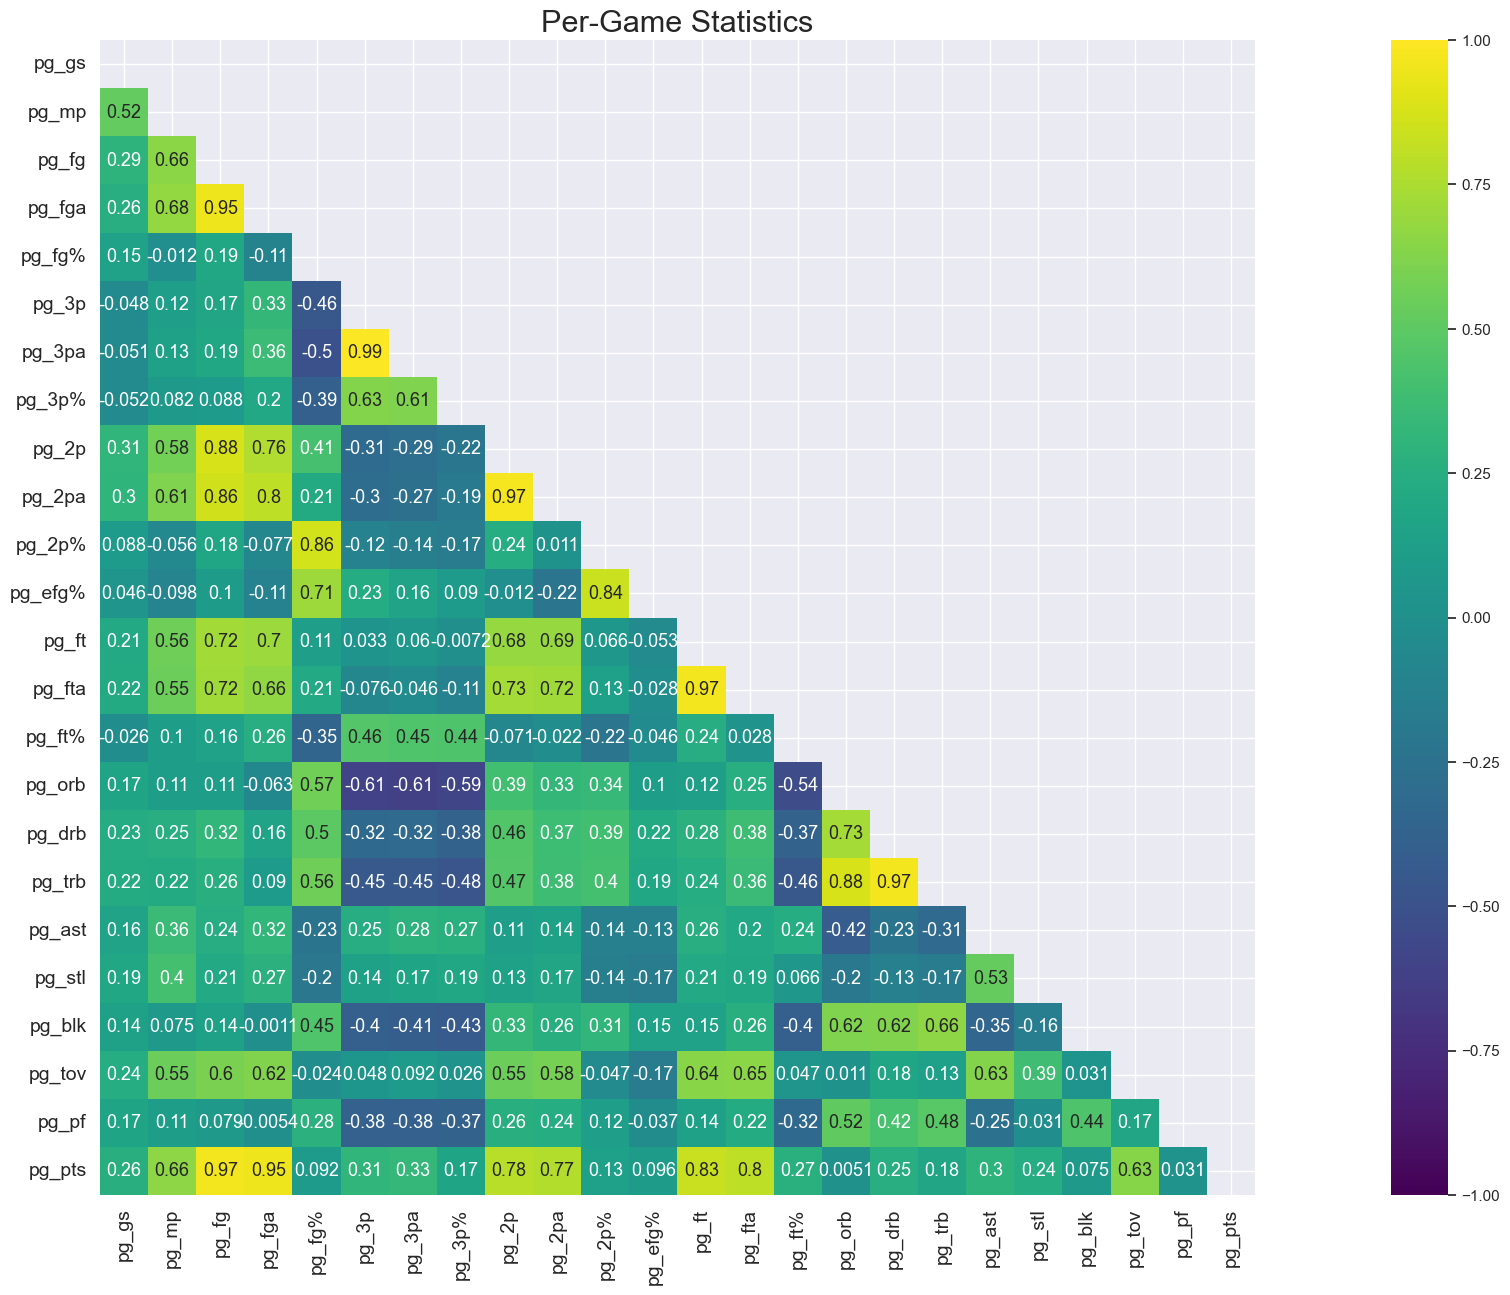

In [14]:
# HEAT MAP
plt.figure(figsize=(35, 15))

df1 = stats.filter(regex='^pg_')
df2 = stats.filter(regex='^adv_')
# df3 = stats.filter(regex='^tot_')

corr = df1.corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            mask = mask, 
            square = True, 
            cmap = 'viridis', 
            annot = True, 
            vmin = -1, 
            vmax = 1,
            #ax=axs[0],
            annot_kws={
                'fontsize': 13,
                #'fontweight': 'bold'
             });
plt.title("Per-Game Statistics", fontdict={'fontsize': 22})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show();

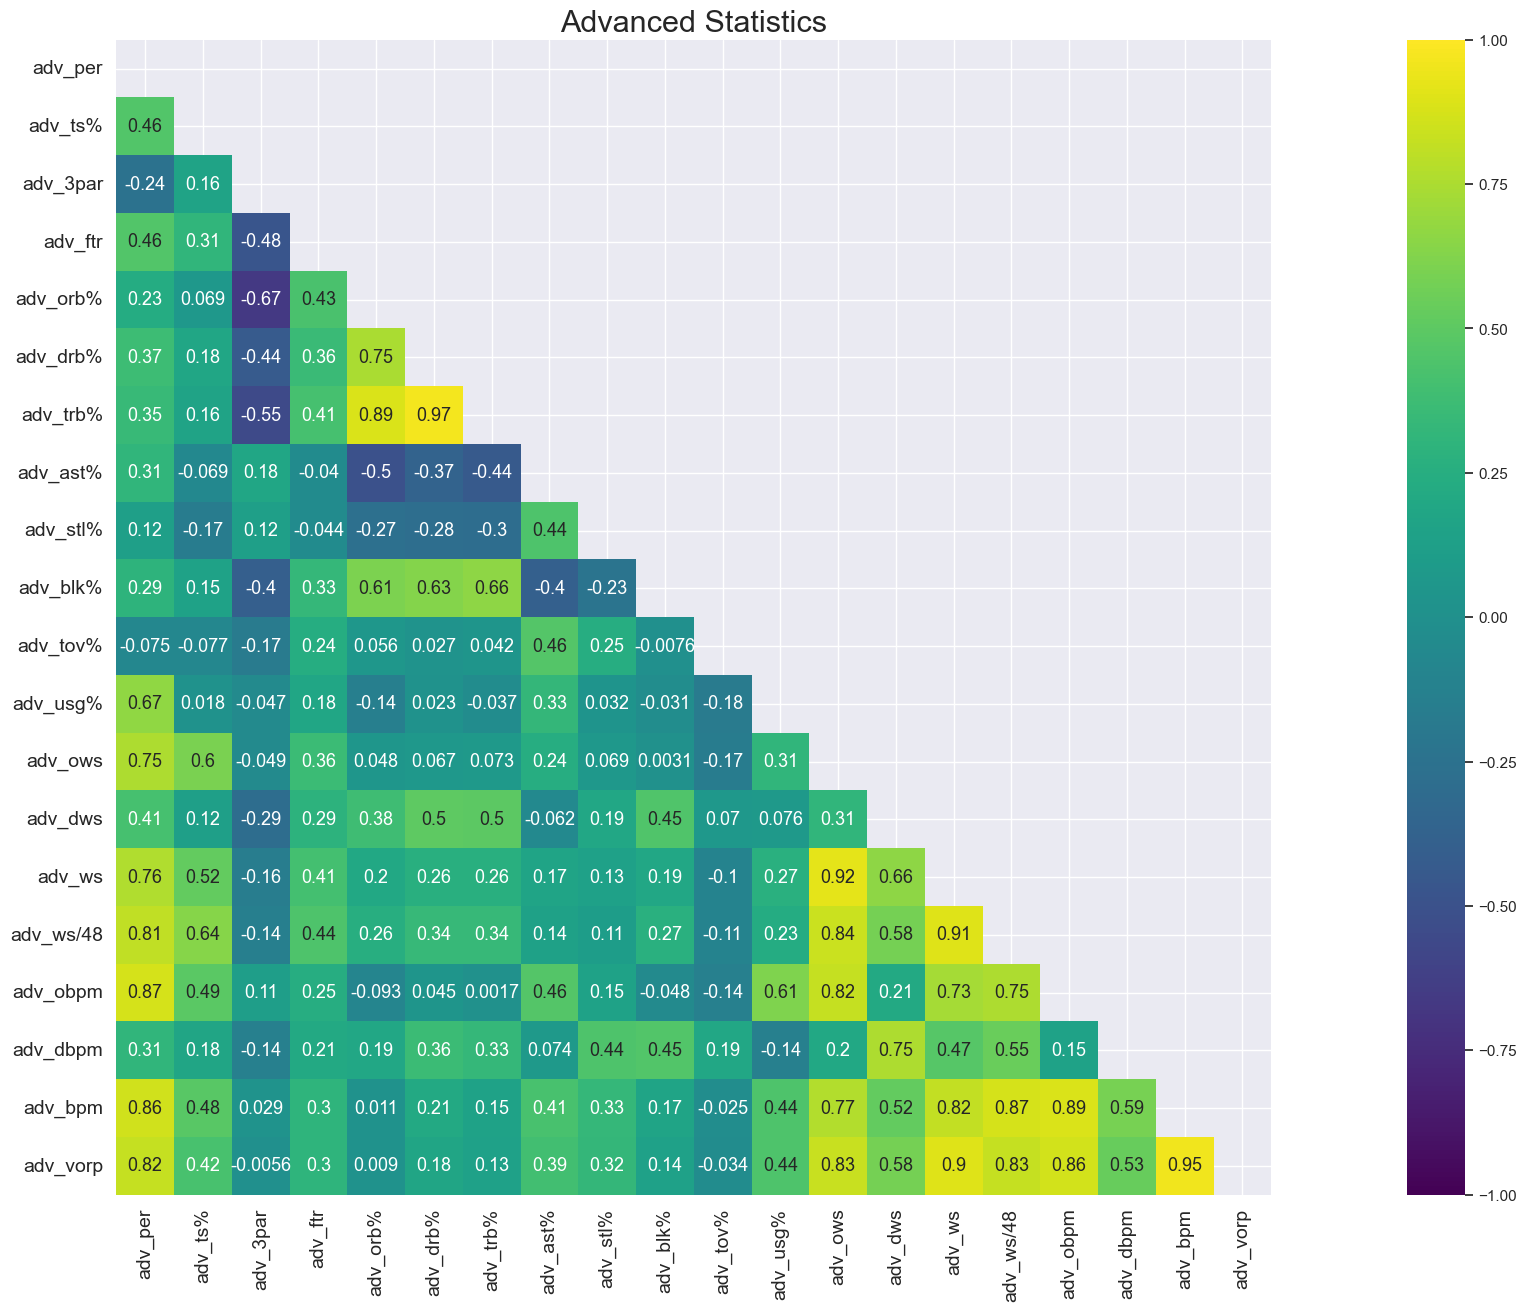

In [15]:
# HEAT MAP
plt.figure(figsize=(35, 15))

df1 = stats.filter(regex='^pg_')
df2 = stats.filter(regex='^adv_')
# df3 = stats.filter(regex='^tot_')

corr = df2.corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            mask = mask, 
            square = True, 
            cmap = 'viridis', 
            annot = True, 
            vmin = -1, 
            vmax = 1,
            #ax=axs[0],
            annot_kws={
                'fontsize': 13,
                #'fontweight': 'bold'
             });
plt.title("Advanced Statistics", fontdict={'fontsize': 22})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show();

##### <span style = 'color:mediumvioletred'> _There are many variables which account for very similar things and are very related to each other. For example, 3-pointers attempted will be highly correlated with 3-pointers made. There are several advanced statistics that try to encapsulate the various aspects of the game - PER, VORP, BPM, WS, eFG%, for example - we will make sure to focus on many of these._ </span>

### Variable Associations
#### Voter Share Correlations

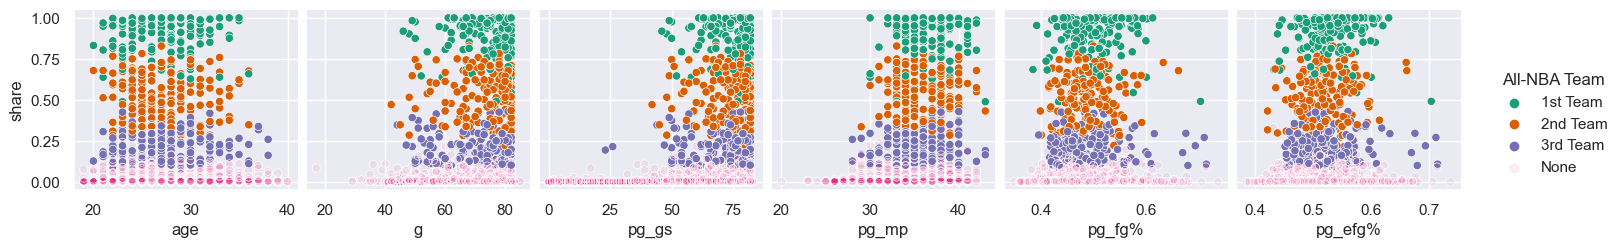

In [16]:
# Narrowing down variables
votes = stats[stats.share > 0]
features_pg = ['age', 'g', 'pg_gs', 'pg_mp', 'pg_fg%', 'pg_efg%', 'pg_trb', 'pg_ast', 'pg_stl', 'pg_blk', 'pg_tov', 'pg_pts']
features_adv = ['adv_per', 'adv_ts%', 'adv_3par', 'adv_ftr', 'adv_trb%', 'adv_ast%', 'adv_stl%', 'adv_blk%', 'adv_tov%', 'adv_usg%', 'adv_ows', 'adv_dws', 'adv_ws']

def pair(fts, yvar):
    
    # Make only None category transparent. Source: ChatGPT
    custom_palette = sns.color_palette('Dark2', n_colors=4)
    custom_palette[3] = (*custom_palette[3][:3], 0.075)  # Set alpha to 0.2 for the 'None' color

    return sns.pairplot(stats, x_vars= fts, y_vars = [yvar], hue='all_nba_winner3', palette=custom_palette, hue_order = ['1st Team', '2nd Team', '3rd Team', 'None'])._legend.set_title('All-NBA Team');

pair(features_pg[:6], 'share')

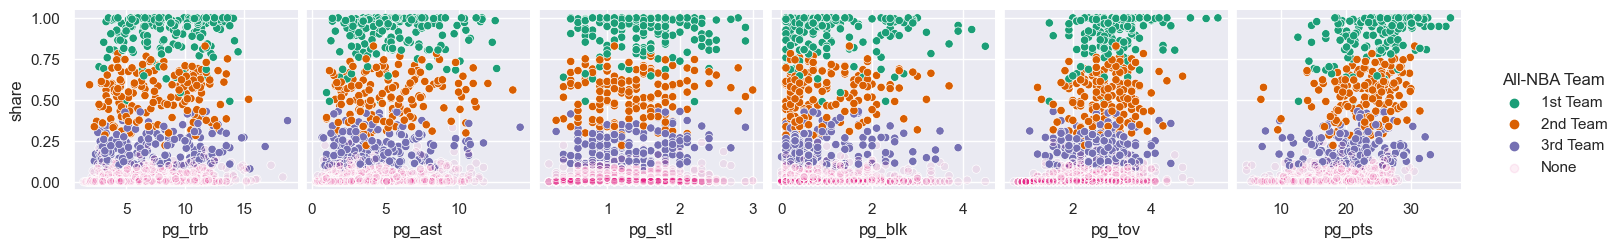

In [17]:
pair(features_pg[6:], 'share')

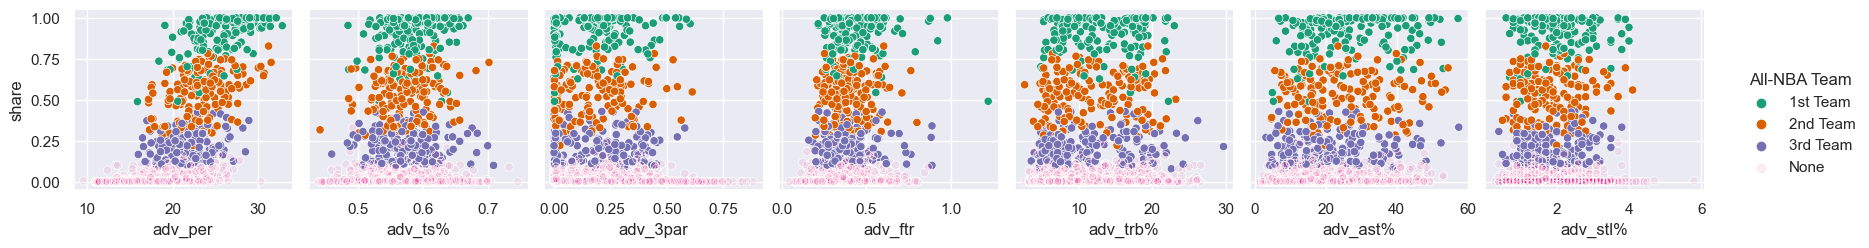

In [18]:
pair(features_adv[:7], 'share')

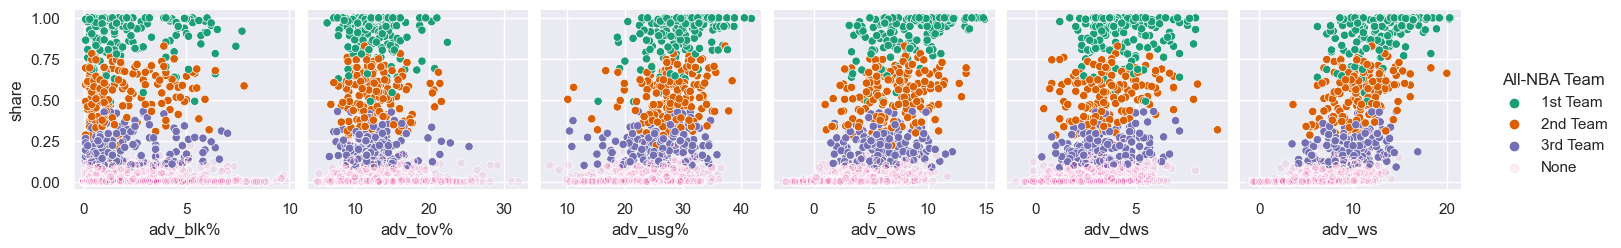

In [19]:
pair(features_adv[7:], 'share')

#### Salary Correlations

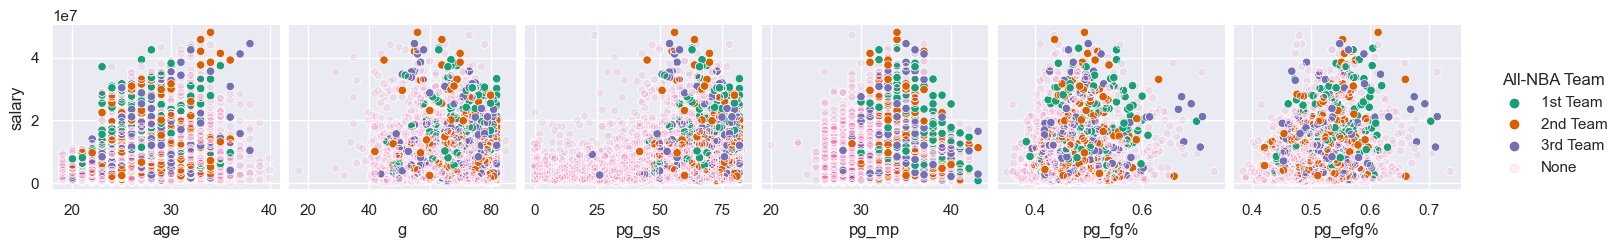

In [20]:
pair(features_pg[:6], 'salary')

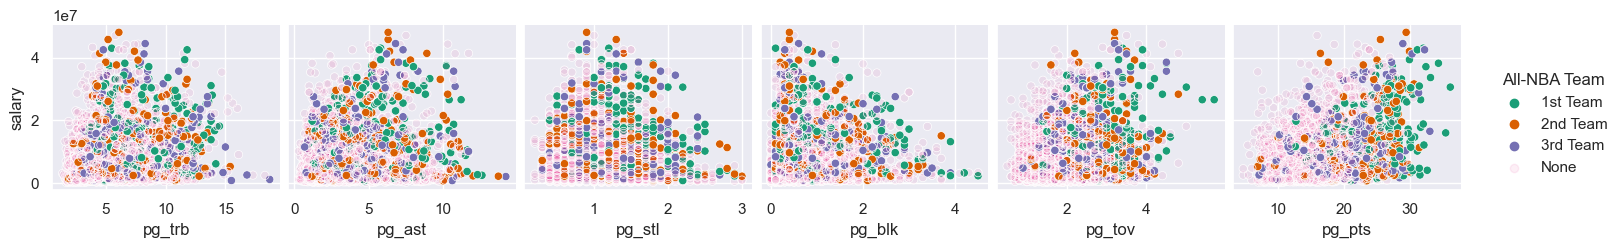

In [21]:
pair(features_pg[6:], 'salary')

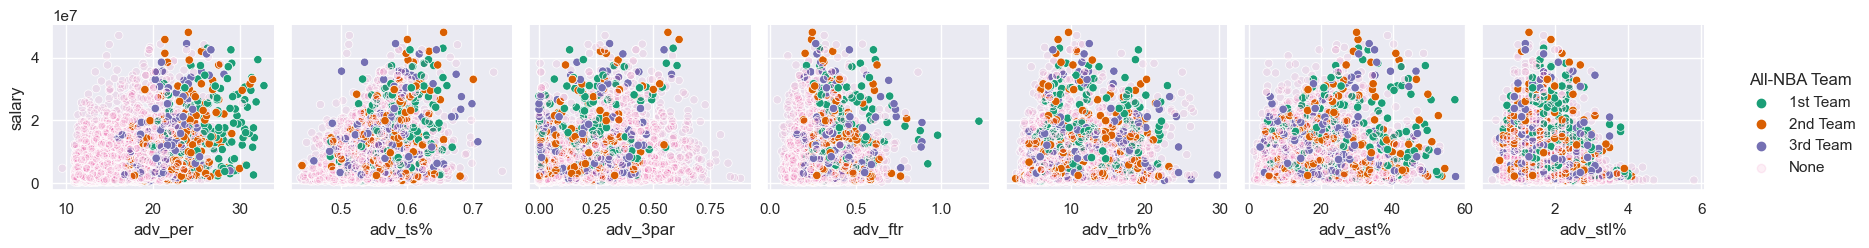

In [22]:
pair(features_adv[:7], 'salary')

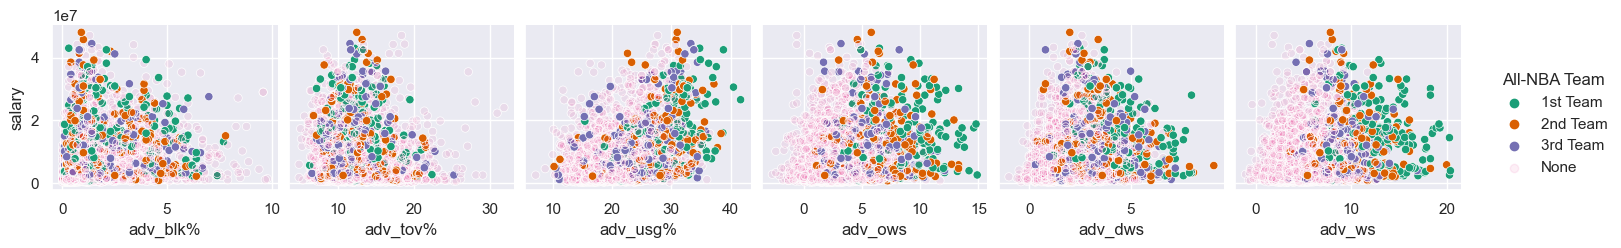

In [23]:
pair(features_adv[7:], 'salary')

##### <span style = 'color:mediumvioletred'> _There do not seem to be any variables which, on their own are highly correlated with getting All-NBA Team voter share. There are several plots that show that 1st Team winners did not have significantly better stats in some key categories than those who made 2nd or 3rd team. For example, the advanced usage rate statistic (adv_usg%) shows that there were many 2nd and 3rd Team winners with the same percentage as 1st Team winners. Player Efficiency Ranking and Win Share seem to be two variables which do have a general upward trend (i.e., the 1st Team players had somewhat higher win shares than 2nd or 3rd Teams)._ </span>

##### <span style = 'color:mediumvioletred'> _Similarly, there is a large amount of variation in 1st, 2nd, and 3rd All-NBA Team selection and salary. The 1st Team winners had generally higher salaries than other players, but there are still many players who were not selected for the All-NBA Team who have salaries as high as those who did._ </span>

---
## II. All-NBA Winner Exploration

### PER, PPG, VORP by Position

In [24]:
def subfmt(feature, title, ylabel, scale):
    sns.set(style="darkgrid")

    fix, ax = plt.subplots(1,3, figsize=(20, 6))

    winners = stats[stats.all_nba_winner.between(1, 3)]
    votegetters = stats[stats.share > 0.0]

    #colors = ['skyblue', 'olive', 'pink', 'gold', 'teal']
    colors = 'viridis'
    #colors = 'plasma'
    
    order = ['PG', 'SG', 'SF', 'PF', 'C']

    sns.boxplot(x= 'pos_5', y=feature, data=stats, palette=colors, order=order, ax=ax[0])
    ax[0].set_title(title + '\nOverall', fontsize=15, fontweight='bold')
    ax[0].set_xlabel('Position', fontsize=13, fontweight='bold')
    ax[0].set_ylabel(ylabel, fontsize=13, fontweight='bold')
    ax[0].set_ylim(scale)  # Set the same y-axis limits for both subplots


    sns.boxplot(x= 'pos_5', y=feature, data=votegetters, palette=colors, order=order, ax=ax[1])
    ax[1].set_title(title + '\nAll-NBA Vote Recievers', fontsize=15, fontweight='bold')
    ax[1].set_xlabel('Position', fontsize=13, fontweight='bold')
    ax[1].set_ylabel(ylabel, fontsize=13, fontweight='bold')
    ax[1].set_ylim(scale)  # Set the same y-axis limits for both subplots

    sns.boxplot(x= 'pos_5', y=feature, data=winners, palette=colors, order=order, ax=ax[2])
    ax[2].set_title(title + '\nAll-NBA Winners', fontsize=15, fontweight='bold')
    ax[2].set_xlabel('Position', fontsize=13, fontweight='bold')
    ax[2].set_ylabel(ylabel, fontsize=13, fontweight='bold')
    ax[2].set_ylim(scale)  # Set the same y-axis limits for both subplots

    plt.tight_layout()
    plt.savefig(f'../images/boxplot_pos_{feature}.png', dpi=300, bbox_inches='tight')

    return plt.show()

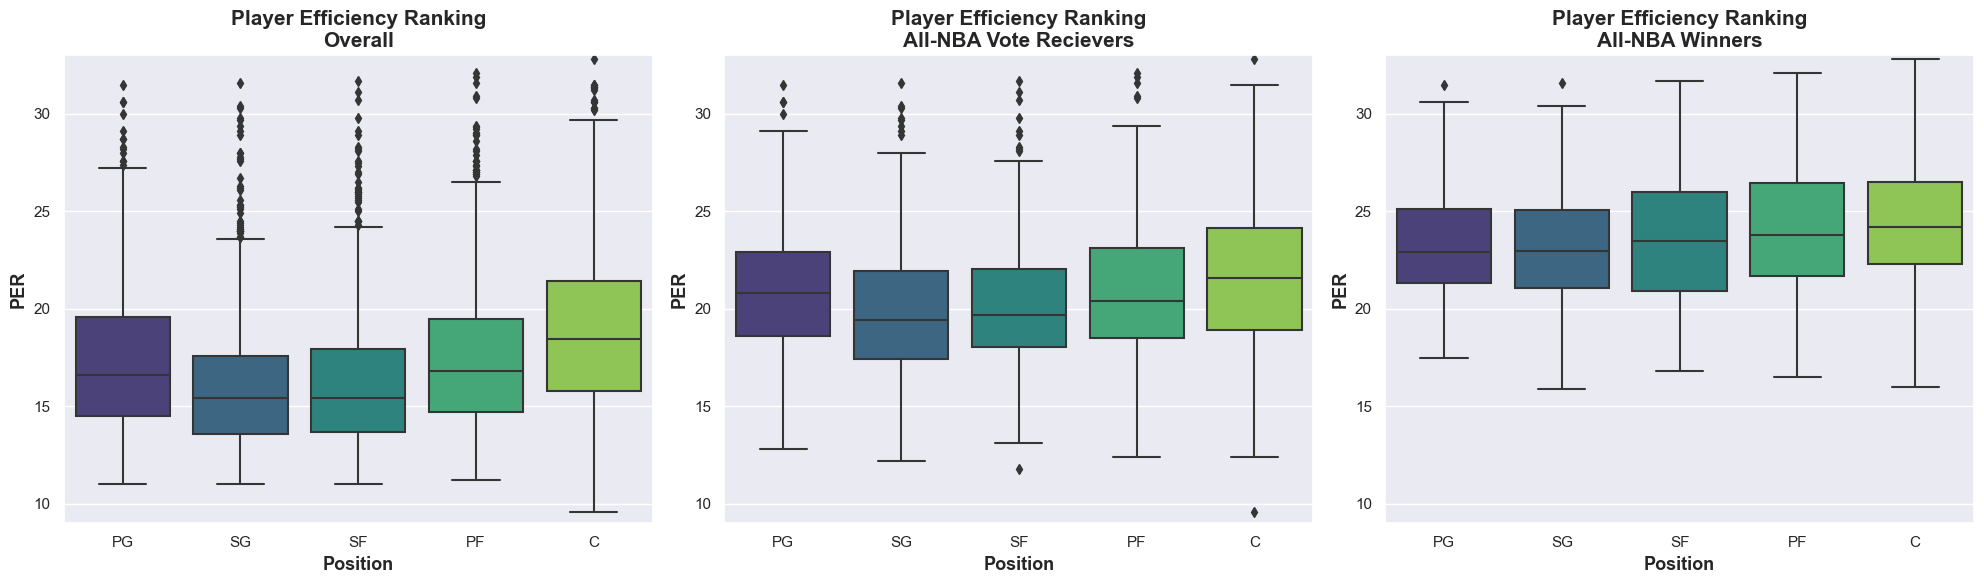

In [25]:
subfmt('adv_per', 'Player Efficiency Ranking', 'PER', (9,33)) 

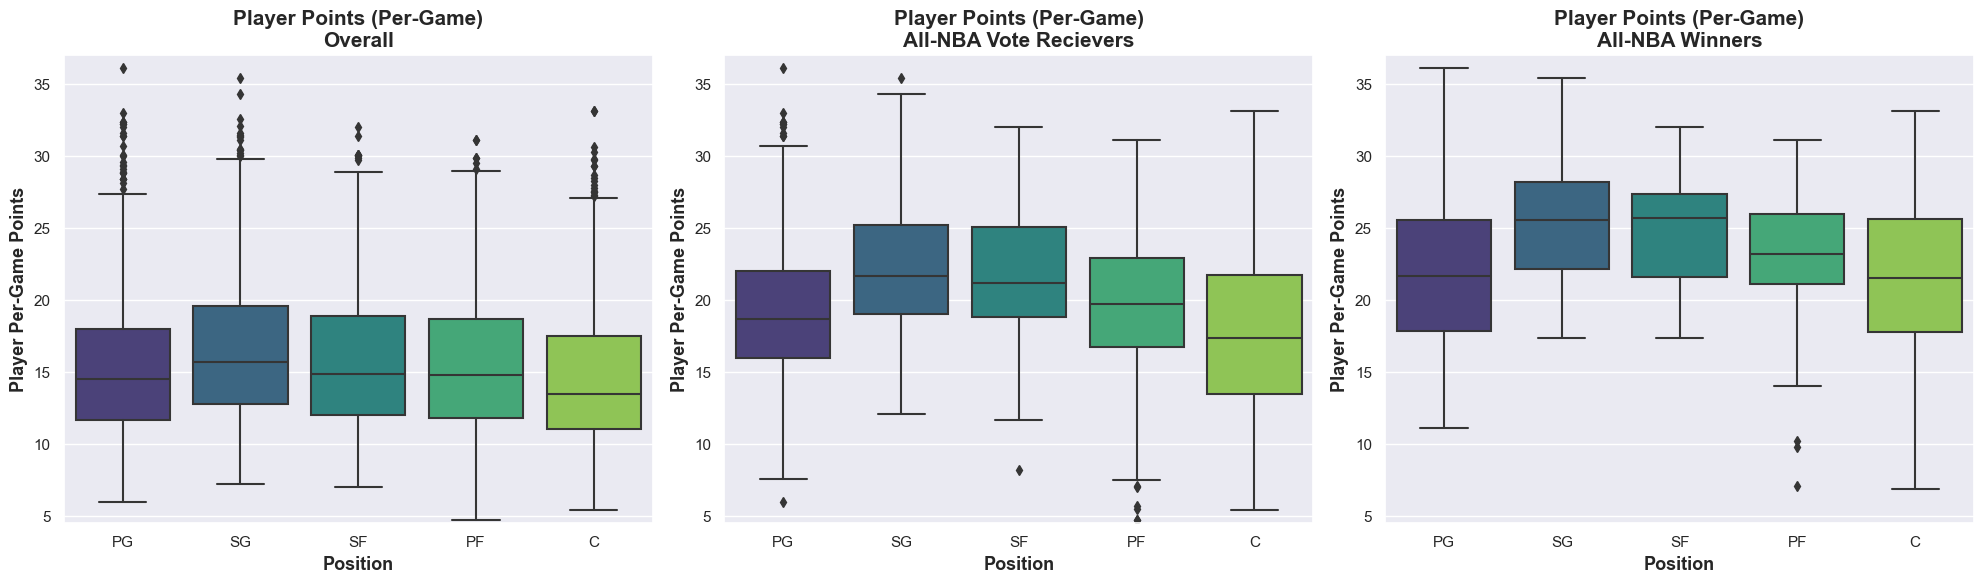

In [26]:
subfmt('pg_pts', 'Player Points (Per-Game)', 'Player Per-Game Points', (4.5,37)) 

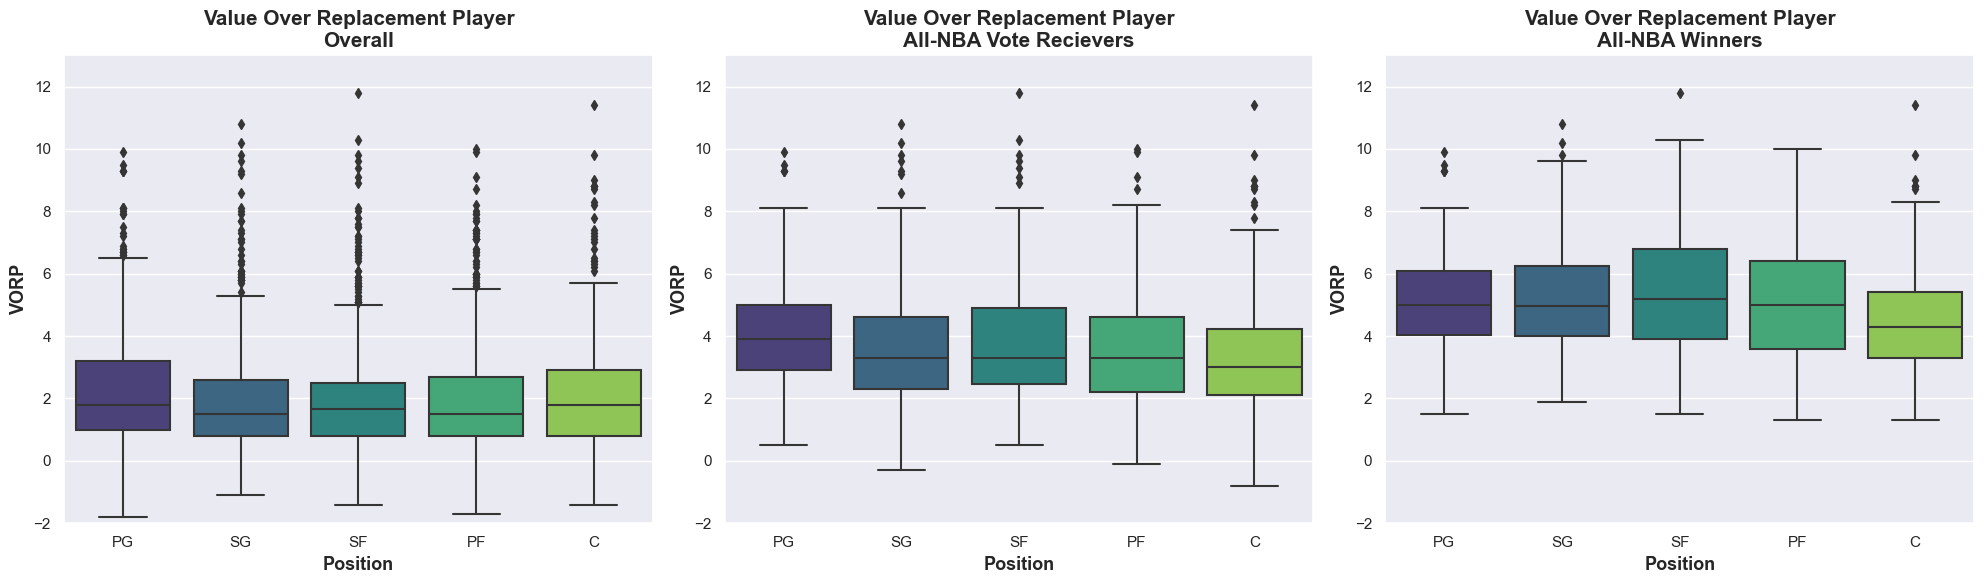

In [27]:
subfmt('adv_vorp', 'Value Over Replacement Player', 'VORP', (-2,13)) 

##### <span style = 'color:mediumvioletred'> _All-NBA Winners had distributions of advanced statistics that were higher than the overall NBA population and the players who received votes but may not have won. Among winners, Centers appeared to have the highest player efficiency, which is likely due to their focused role in the paint (limiting versatility in scoring options, such as 3-pointers or field goals outside the paint). Shooting Guards appeared to have the highest points per game, as they likely had to make an impact in scoring to be selected. Small Forwards had the highest VORP, which may be due to the versatility of the position and opportunities to become strong role players._ </span>

### PER and TS% by Position Among Winners

In [28]:
def subfmt2(feature, title, ylabel, scale):
    sns.set(style="darkgrid")

    fix, ax = plt.subplots(1,3, figsize=(20, 6))

    winners30 = stats[(stats.all_nba_winner.between(1, 3)) & (stats.year.between(1990,1999))]
    winners15 = stats[(stats.all_nba_winner.between(1, 3)) & (stats.year.between(2000,2009))]
    winners0 = stats[(stats.all_nba_winner.between(1, 3)) & (stats.year.between(2010,2022))]

    #colors = ['skyblue', 'olive', 'pink', 'gold', 'teal']
    #colors = 'viridis'
    colors = 'plasma'
    
    order = ['PG', 'SG', 'SF', 'PF', 'C']
    
    sns.boxplot(x= 'pos_5', y=feature, data=winners0, palette=colors, order=order, ax=ax[0])
    ax[0].set_title(title + ' Among Winners \n2010-2022', fontsize=14, fontweight='bold')
    ax[0].set_xlabel('Position', fontsize=12, fontweight='bold')
    ax[0].set_ylabel(ylabel, fontsize=12, fontweight='bold')
    ax[0].set_ylim(scale)  # Set the same y-axis limits for both subplots


    sns.boxplot(x= 'pos_5', y=feature, data=winners15, palette=colors, order=order, ax=ax[1])
    ax[1].set_title(title + ' Among Winners \n2000-2009', fontsize=14, fontweight='bold')
    ax[1].set_xlabel('Position', fontsize=12, fontweight='bold')
    ax[1].set_ylabel(ylabel, fontsize=12, fontweight='bold')
    ax[1].set_ylim(scale)  # Set the same y-axis limits for both subplots

    sns.boxplot(x= 'pos_5', y=feature, data=winners30, palette=colors, order=order, ax=ax[2])
    ax[2].set_title(title + ' Among Winners \n1990-1999', fontsize=14, fontweight='bold')
    ax[2].set_xlabel('Position', fontsize=12, fontweight='bold')
    ax[2].set_ylabel(ylabel, fontsize=12, fontweight='bold')
    ax[2].set_ylim(scale)  # Set the same y-axis limits for both subplots
    
    plt.tight_layout()
    plt.savefig(f'../images/boxplot_pos_{feature}_allnba.png', dpi=300, bbox_inches='tight')

    return plt.show()

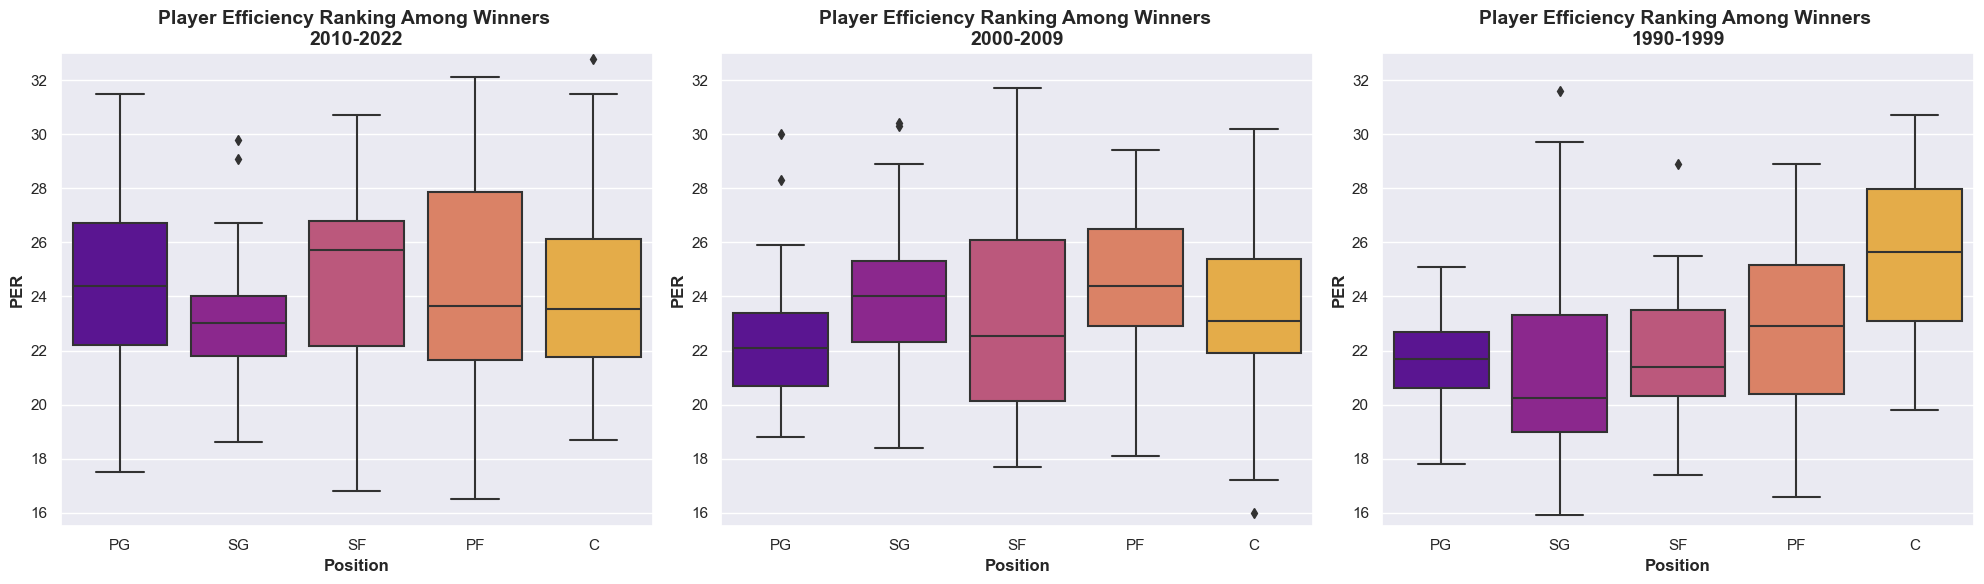

In [29]:
subfmt2('adv_per', 'Player Efficiency Ranking', 'PER', (15.5,33))

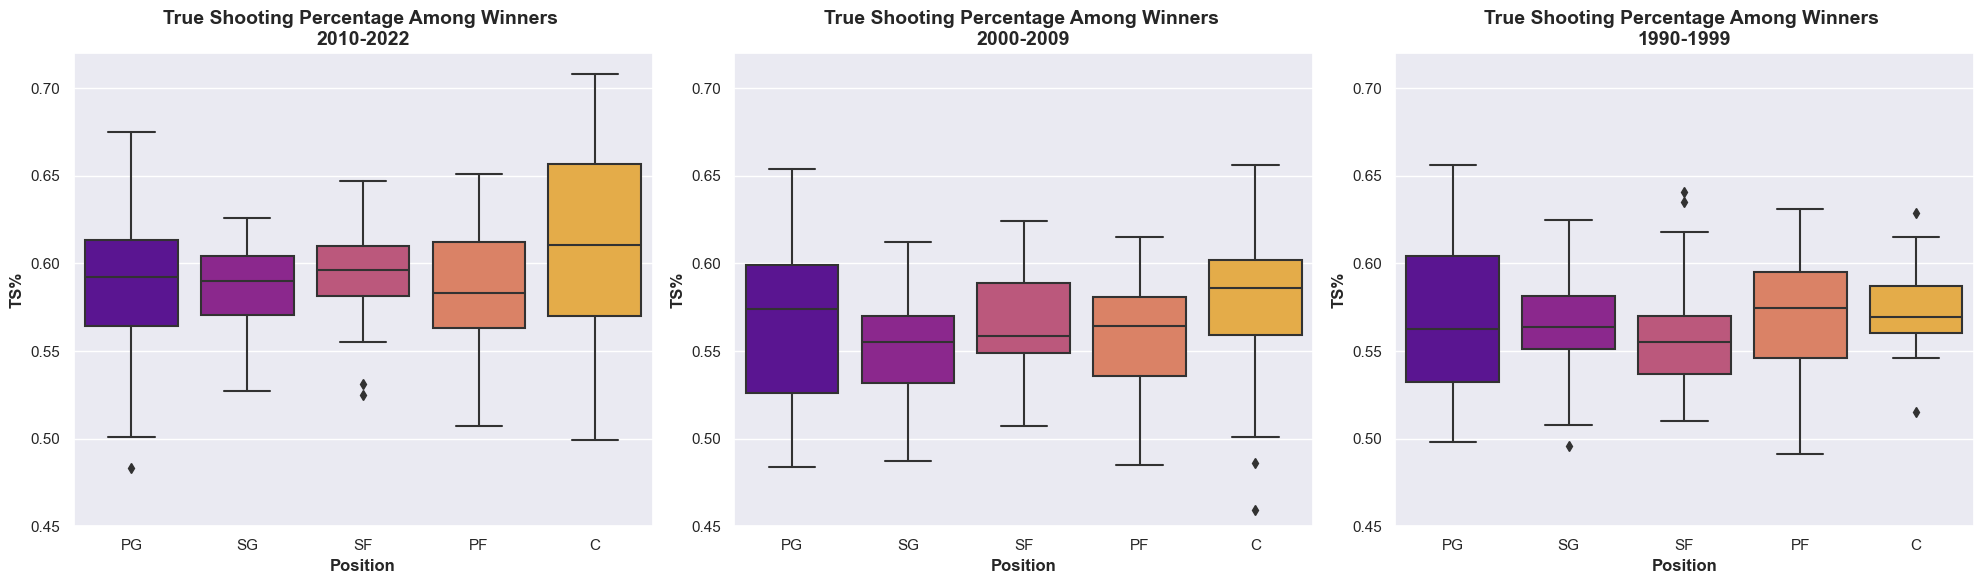

In [30]:
subfmt2('adv_ts%', 'True Shooting Percentage', 'TS%', (0.45,0.72))

##### <span style = 'color:mediumvioletred'> _It seems that the player efficiency of all positions, except Center, have increased since the 90s. This could be in direct correlation to the other positions becoming more efficient, therefore, it is possible that relatively fewer plays go through the Center in current day games. The True Shooting Percentage of Point Guards has decreased in variability in the 2010s vs. the 1990s, meaning fewer players with lower percentages are being selected. Centers selected for the All-NBA Team have a higher variation in the 2010s than they did in the 1990s. This could be due to the evolution of Centers in the NBA, where in the past they were often more traditional post-up players, relying on close-range shots and physicality. In contrast, modern Centers are more versatile, incorporating outside shooting and play-making into their offense, which could lead to a higher range of TS%._ </span>

### PER and BPM Comparison Among 1st, 2nd, & 3rd Team

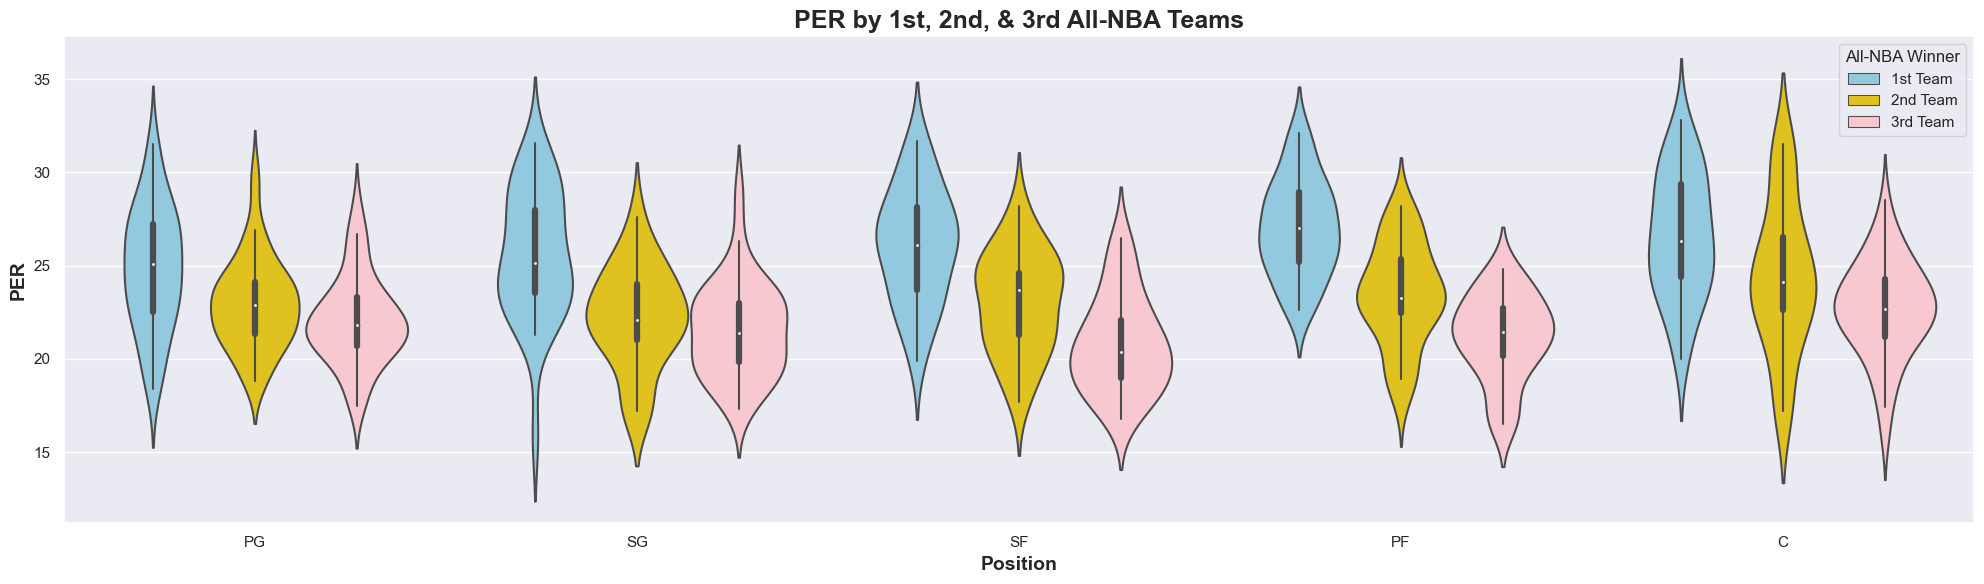

In [31]:
colors = ['skyblue', 'gold', 'pink', 'teal']

plt.figure(figsize=(20,6))
order = ['PG', 'SG', 'SF', 'PF', 'C']

sns.violinplot(x="pos_5", y="adv_per", hue="all_nba_winner2", data=stats, order=order, palette=colors)

plt.title('PER by 1st, 2nd, & 3rd All-NBA Teams', fontweight='bold', fontsize=18) 
plt.xlabel('Position', fontsize = 14, fontweight='bold') 
plt.ylabel('PER', fontsize = 14, fontweight='bold') 
legend = plt.gca().get_legend()
legend.set_title('All-NBA Winner')

plt.tight_layout()
plt.savefig(f'../images/violin_pos_per.png', dpi=300, bbox_inches='tight')
plt.show()    

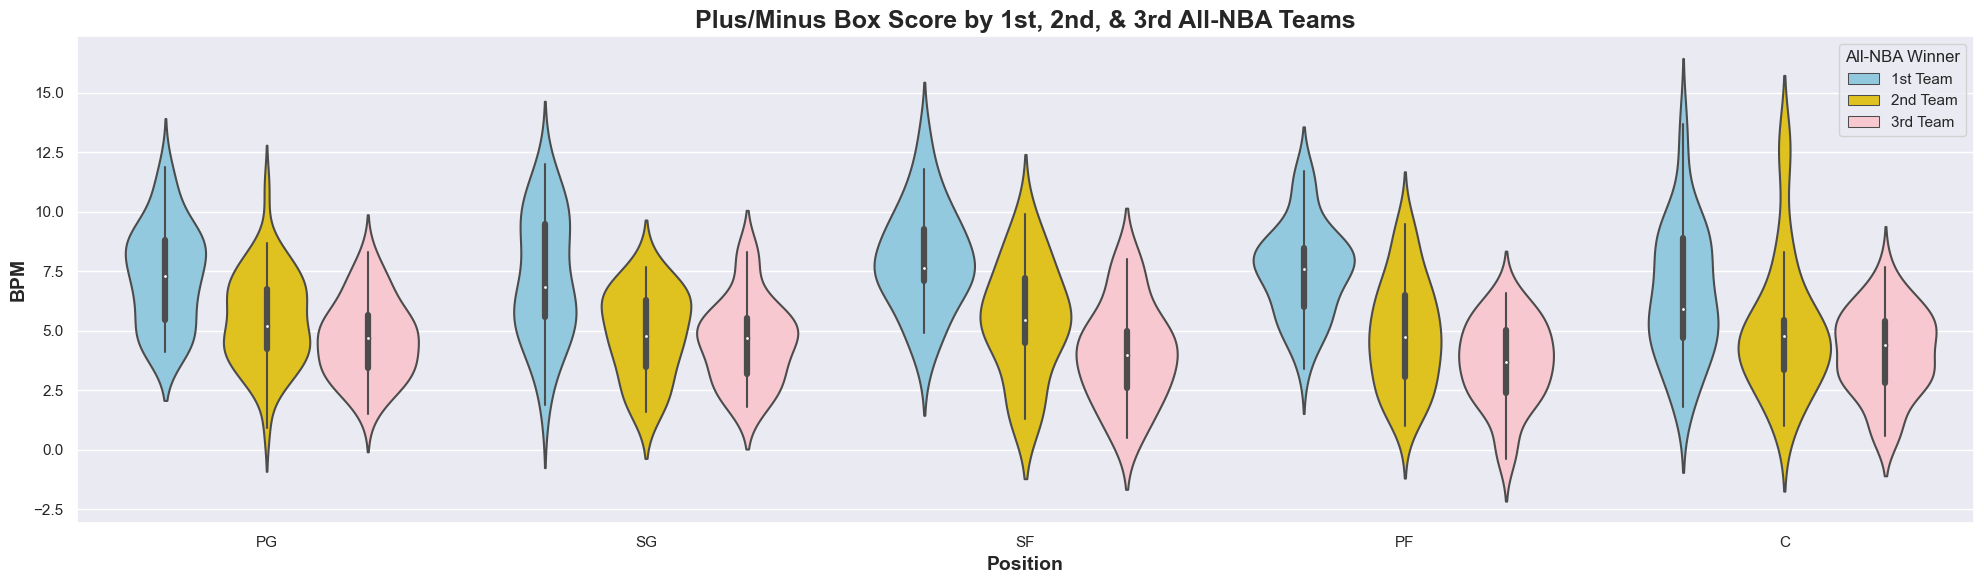

In [32]:
colors = ['skyblue', 'gold', 'pink', 'teal']

plt.figure(figsize=(20,6))
order = ['PG', 'SG', 'SF', 'PF', 'C']

sns.violinplot(x="pos_5", y="adv_bpm", hue="all_nba_winner2", data=stats, order=order, palette=colors)

plt.title('Plus/Minus Box Score by 1st, 2nd, & 3rd All-NBA Teams', fontweight='bold', fontsize=18) 
plt.xlabel('Position', fontsize = 14, fontweight='bold') 
plt.ylabel('BPM',fontsize = 14,  fontweight='bold') 
legend = plt.gca().get_legend()
legend.set_title('All-NBA Winner')

plt.tight_layout()
plt.savefig(f'../images/violin_pos_bpm.png', dpi=300, bbox_inches='tight')
plt.show() 

##### <span style = 'color:mediumvioletred'> _While there is a distinction in PER and BPM between 1st, 2nd, and 3rd Team winners, there is much overlap. The Point Guard Position may be very competitive, as there the 2nd and 3rd team metrics look fairly similar. The highest distinctions between 1st, 2nd, and 3rd Team winners appears to be coming from the larger players in the back court (Power Forwards and Centers)._ </span>

### Win Share by PER, VORP, & BPM

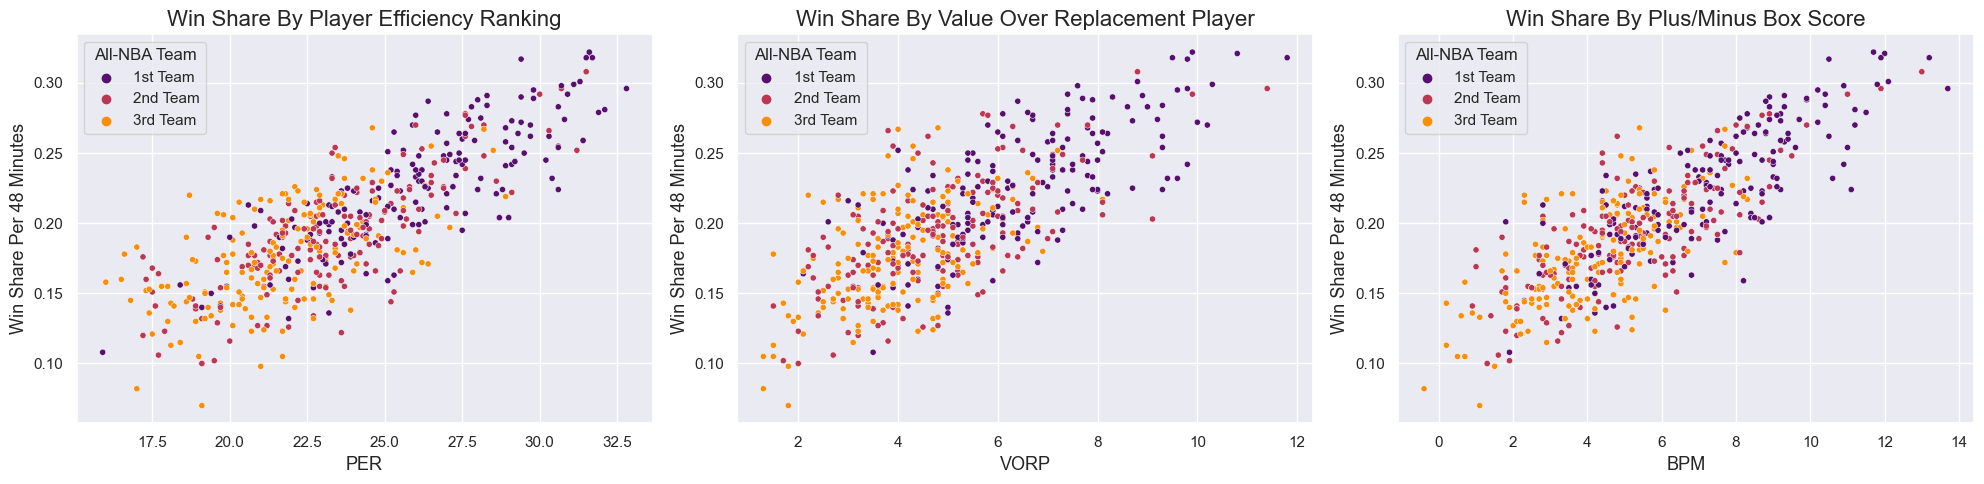

In [33]:
fig, ax = plt.subplots(1,3, figsize = (20, 5))

sns.scatterplot(x = stats['adv_per'], y = stats['adv_ws/48'], hue = stats['all_nba_winner2'], palette = 'inferno', s=20, ax=ax[0])
ax[0].set_title('Win Share By Player Efficiency Ranking', fontsize = 16)
ax[0].set_xlabel('PER', fontsize=13)
ax[0].set_ylabel('Win Share Per 48 Minutes', fontsize=13)
#ax[0].legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = 'All-NBA Team'); 
ax[0].legend(title = 'All-NBA Team'); 

sns.scatterplot(x = stats['adv_vorp'], y = stats['adv_ws/48'], hue = stats['all_nba_winner2'], palette = 'inferno', s=20, ax=ax[1])
ax[1].set_title('Win Share By Value Over Replacement Player', fontsize = 16)
ax[1].set_xlabel('VORP', fontsize=13)
ax[1].set_ylabel('Win Share Per 48 Minutes', fontsize=13)
#ax[1].legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = 'All-NBA Team'); 
ax[1].legend(title = 'All-NBA Team'); 

sns.scatterplot(x = stats['adv_bpm'], y = stats['adv_ws/48'], hue = stats['all_nba_winner2'], palette = 'inferno', s=20, ax=ax[2])
ax[2].set_title('Win Share By Plus/Minus Box Score', fontsize = 16)
ax[2].set_xlabel('BPM', fontsize=13)
ax[2].set_ylabel('Win Share Per 48 Minutes', fontsize=13)
#ax[2].legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = 'All-NBA Team'); 
ax[2].legend(title = 'All-NBA Team'); 

plt.tight_layout()
plt.savefig(f'../images/scatter_ws_stats.png', dpi=300, bbox_inches='tight')
plt.show() 

##### <span style = 'color:mediumvioletred'> _There is a positive correlation between Win Share per 48 minutes, PER, VORP, and BPM. The overlap between 1st, 2nd, and 3rd Teams is seen again here. While the 1st Team players are scattered towards the top right, there are also many 1st Team players with statistics that are the same as players who won 2nd and 3rd Team placements. This is very likely dependent on the season, as each year has a unique story._ </span>

### Players With Most Selections

In [34]:
player_wins = stats.groupby('player')['all_nba_winner2'].count().reset_index()
player_wins.sort_values(by = 'all_nba_winner2', ascending=False, inplace=True)

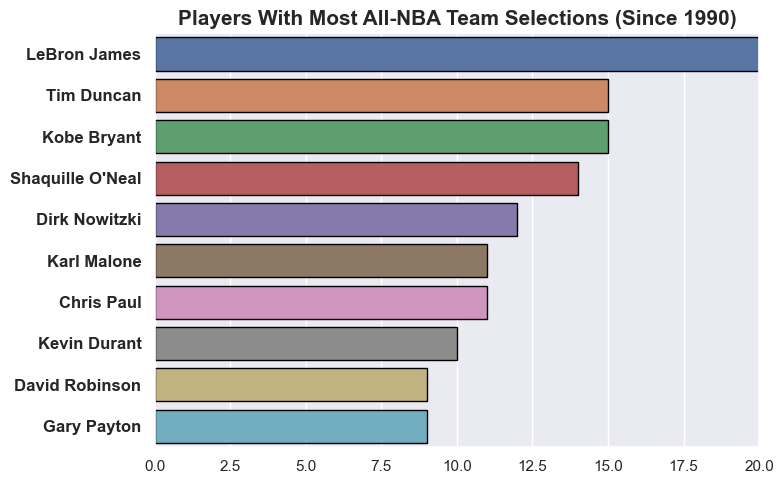

In [35]:
sns.set(style="darkgrid")

plt.figure(figsize = (8,5))
ax = sns.barplot(player_wins[:10], x='all_nba_winner2', y='player',  edgecolor = 'black')

plt.title('Players With Most All-NBA Team Selections (Since 1990)', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontweight='bold', fontsize=12)
ax.set_xlim(0,20)

plt.tight_layout()
plt.savefig(f'../images/barplot_top10_recievers.png', dpi=300, bbox_inches='tight')
plt.show() 

In [36]:
top10 = player_wins[:10].drop(columns='all_nba_winner2')
only_winners = stats[stats.all_nba_winner.between(1, 3)]
only_winners = only_winners.groupby(['player', 'all_nba_winner2']).size().reset_index(name='count').sort_values(by='player')
only_winners_top = only_winners.merge(top10, how='right', on = 'player') 

In [37]:
only_winners_pivot = only_winners_top.groupby(['player', 'all_nba_winner2'])['count'].sum().unstack(fill_value=0)

<Figure size 1000x600 with 0 Axes>

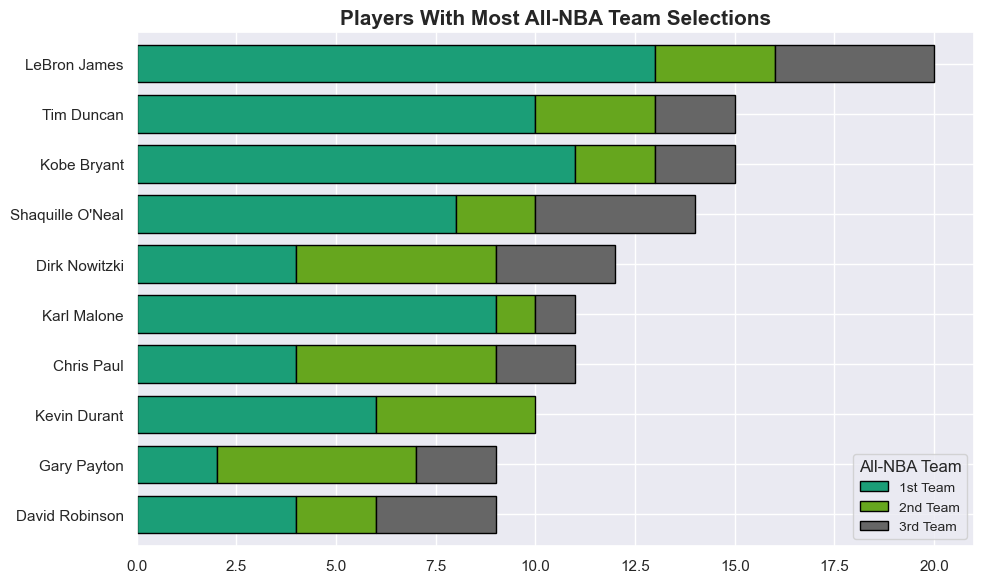

In [38]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

only_winners_pivot['Total'] = only_winners_pivot.sum(axis=1)
only_winners_pivot = only_winners_pivot.sort_values(by='Total')
only_winners_pivot.drop(columns='Total', inplace=True)

only_winners_pivot.plot(kind='barh', stacked=True, colormap='Dark2', figsize=(10, 6), width=0.75, edgecolor='black')

plt.title('Players With Most All-NBA Team Selections', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('')

plt.legend(title='All-NBA Team', fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.savefig(f'../images/bar_stack_top10_recievers.png', dpi=300, bbox_inches='tight')
plt.show() ;

---
## III. Salary Information Exploration

### Salary Distributions Across Years

In [39]:
def histsal(xvar, xlabel):
    sns.set(style="darkgrid")
    fig, axs = plt.subplots(2, 2, figsize=(18, 7))

    thirty_yrs = stats[stats.year == 1992]
    twenty_yrs = stats[stats.year == 2002]
    ten_yrs = stats[stats.year == 2012]
    current = stats[stats.year == 2022]

    sns.histplot(data=current, x=xvar, kde=True, color="skyblue", ax=axs[0,0])
    sns.histplot(data=ten_yrs, x=xvar, kde=True, color="olive", ax=axs[0,1])
    sns.histplot(data=twenty_yrs, x=xvar, kde=True, color="pink", ax=axs[1,0])
    sns.histplot(data=thirty_yrs, x=xvar, kde=True, color="gold", ax=axs[1,1])

    #for ax in axs.flat:
      #  ax.set_xlim(0, 50000000)

    axs[0,0].set_title('Current: 2022-23 Season ' '\n'+ xlabel + ' Distribution', fontsize=14, fontweight='bold')
    axs[0,1].set_title('Ten Years Ago: 2012-13 Season ' '\n'+ xlabel + ' Distribution', fontsize=14, fontweight='bold')
    axs[1,0].set_title('Twenty Years Ago: 2002-03 Season ' '\n'+ xlabel + ' Distribution', fontsize=14, fontweight='bold')
    axs[1,1].set_title('Thirty Years Ago: 1992-93 Season ' '\n'+ xlabel + ' Distribution', fontsize=14, fontweight='bold')

    # Remove xlabel for all subplots
    for ax in axs.flat:
        ax.set_xlabel('')
        ax.set_ylabel('')

    plt.tight_layout()
    plt.savefig(f'../images/histogram_{xvar}.png', dpi=300, bbox_inches='tight')
    
    return plt.show()

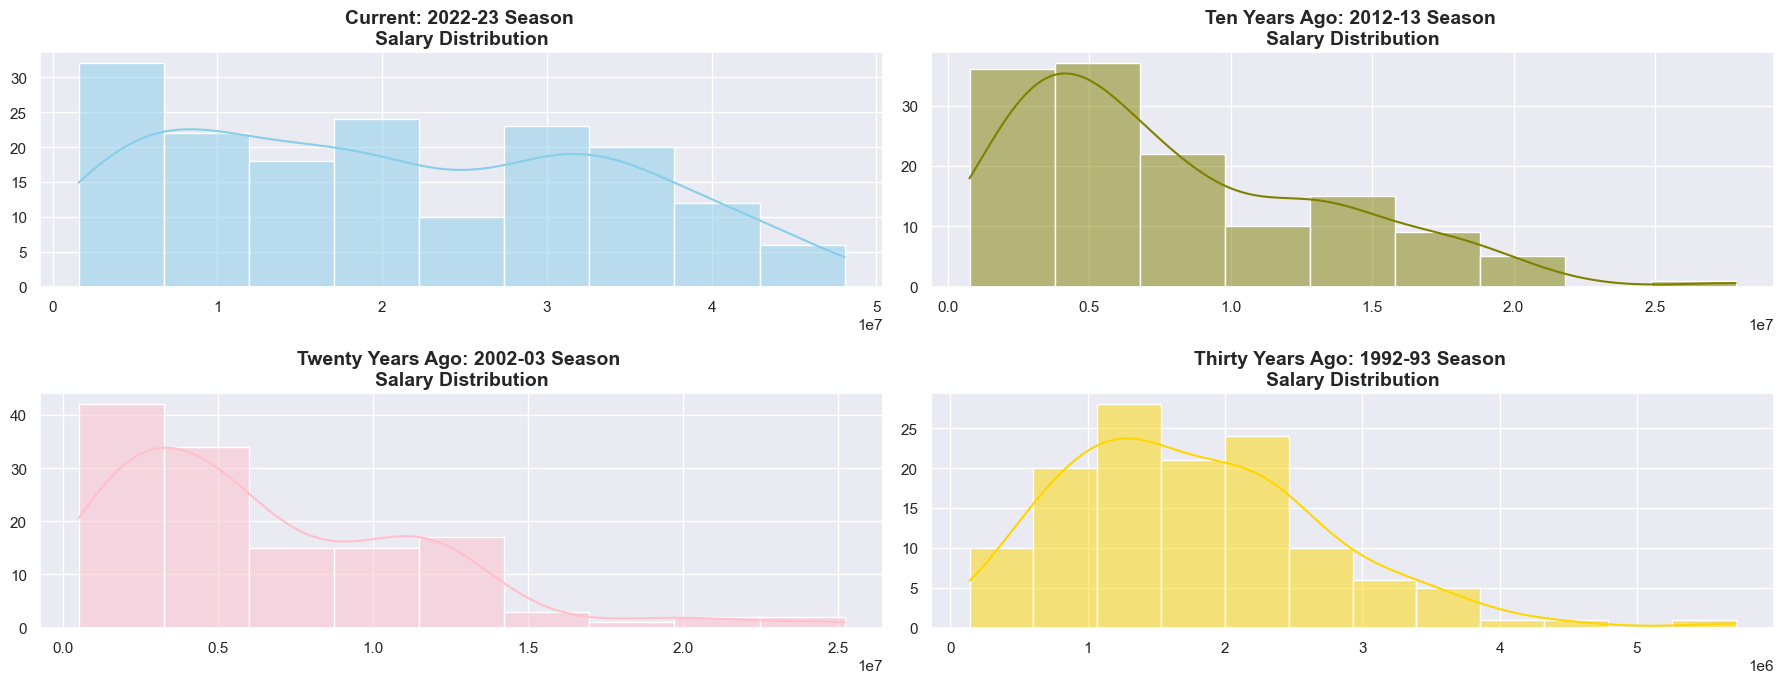

In [40]:
histsal('salary', 'Salary')

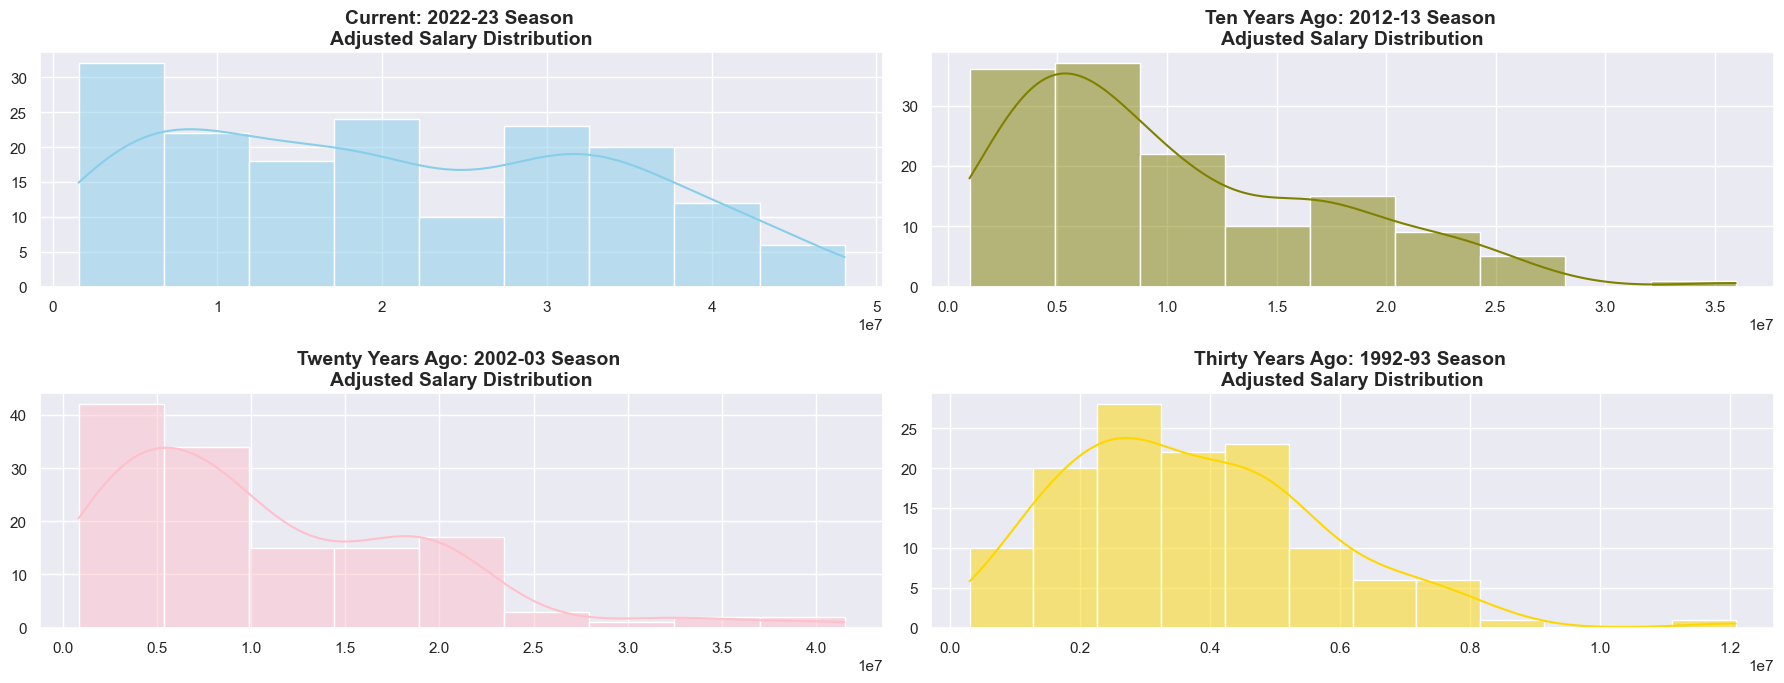

In [41]:
histsal('salary_adj', 'Adjusted Salary')

##### <span style = 'color:mediumvioletred'> _Player salaries have increased drastically over the last 30 years, even after adjusting for inflation. In the 1992-93 season, the maximum contract a player signed was \\$12M (adjusted), whereas in present day there are maximum contracts close to \\$50M. This may in part be due to growing popularity of the sport, sponsorships, and the 2014 TV deal with ESPN/Turner Sports._ </span>

### Salary Cap vs. Team Payroll

In [42]:
salcap = stats[['year', 'salary_cap', 'salary_cap_adj']].drop_duplicates().reset_index().drop(columns=['index'])

In [43]:
avg_payroll = stats.groupby('year')['payroll'].agg(['mean', 'min', 'max']).reset_index().rename(columns={'mean':'avg_payroll', 'min':'min_payroll', 'max':'max_payroll'})
avg_payroll_adj = stats.groupby('year')['payroll_adj'].agg(['mean', 'min', 'max']).reset_index().rename(columns={'mean':'avg_payroll_adj', 'min':'min_payroll_adj', 'max':'max_payroll_adj'})

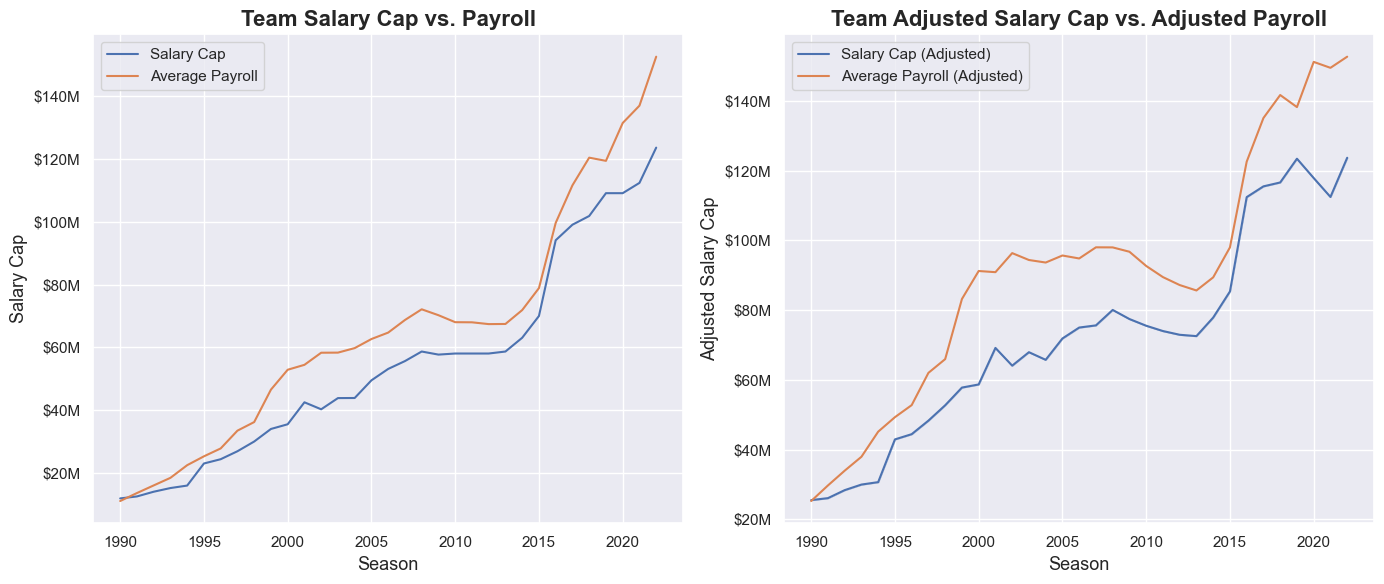

In [44]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.lineplot(data=salcap, x="year", y="salary_cap", label = 'Salary Cap', ax=ax[0])
sns.lineplot(data=avg_payroll, x="year", y="avg_payroll", label = 'Average Payroll', ax=ax[0])

ax[0].set_title('Team Salary Cap vs. Payroll', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Season', fontsize=13)
ax[0].set_ylabel('Salary Cap', fontsize=13)
ax[0].legend()

sns.lineplot(data=stats, x="year", y="salary_cap_adj", label = 'Salary Cap (Adjusted)', ax=ax[1])
sns.lineplot(data=avg_payroll_adj, x="year", y="avg_payroll_adj", label = 'Average Payroll (Adjusted)', ax=ax[1])

ax[1].set_title('Team Adjusted Salary Cap vs. Adjusted Payroll', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Season', fontsize=13)
ax[1].set_ylabel('Adjusted Salary Cap', fontsize=13)
ax[1].legend()

import matplotlib.ticker as ticker
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/10**6:.0f}M'));
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/10**6:.0f}M'));

plt.tight_layout()
plt.savefig(f'../images/line_salcap_payroll.png', dpi=300, bbox_inches='tight')
plt.show()

##### <span style = 'color:mediumvioletred'> _The salary cap has increased significantly since 1990, and the average team payroll is fairly higher than the salary cap. It appears that teams have always exceeded the cap since 1990, but the differential appears to have increased starting around 2000._ </span>

### Salary Cap Differential: Amount Spent Above/Below the Salary Cap

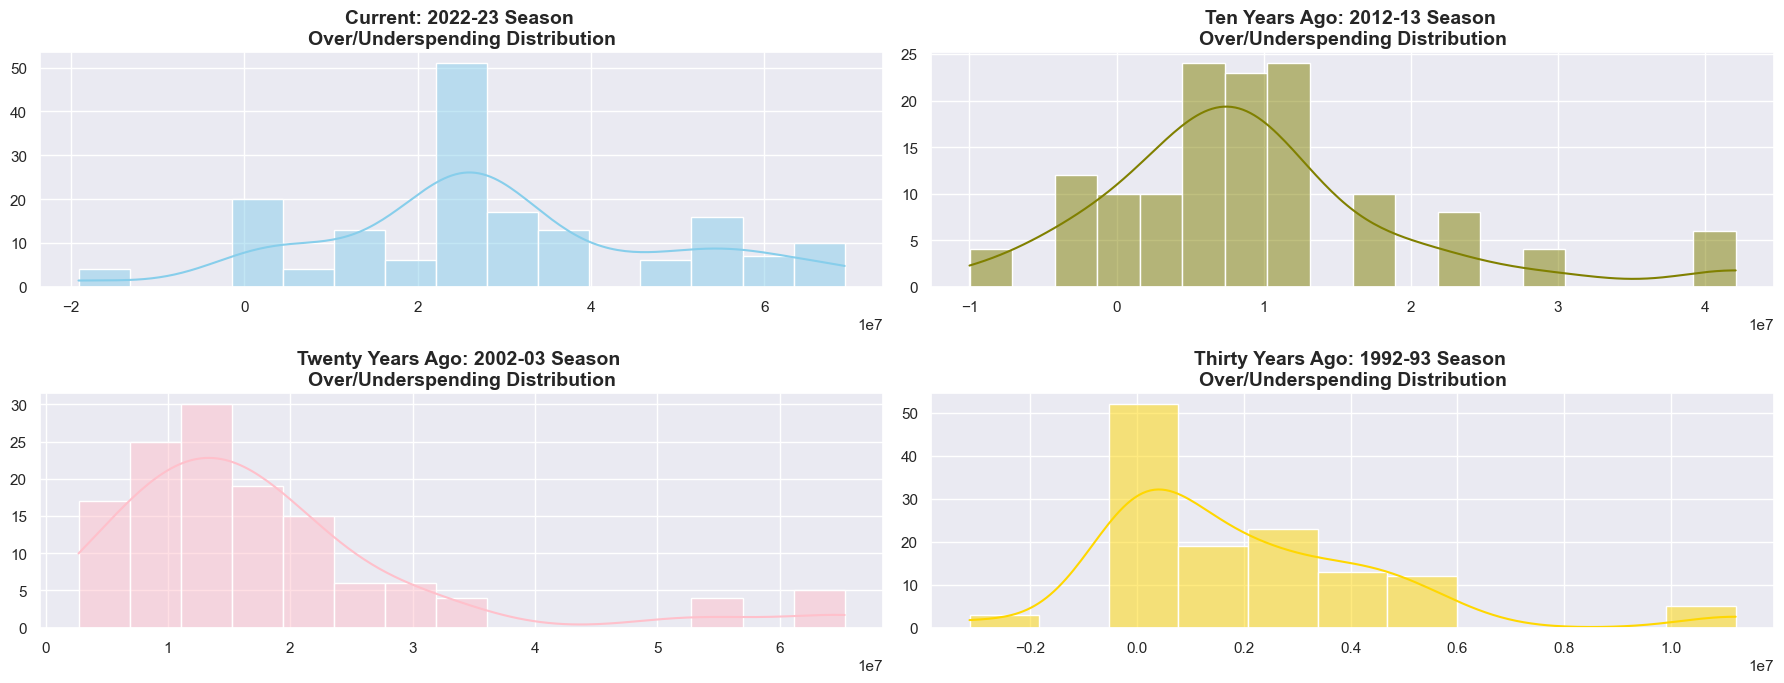

In [45]:
stats['diff_cap'] = stats['payroll'] - stats['salary_cap']
stats['diff_cap_adj'] = stats['payroll_adj'] - stats['salary_cap_adj']
histsal('diff_cap', 'Over/Underspending')

##### <span style = 'color:mediumvioletred'> _Since the early 90s, it appears that overspending (i.e., amount payroll is greater than salary cap) has increased. In the 1992-93 season, most team payrolls were close to the cap; the highest payroll was \\$10M over the salary cap (this appeared to be an outlier, as no other teams were close to this amount). In 2022, most teams were \~\\$30M over the salary cap, with the maximum being \~\$70M over._ </span>

### Salary Cap Differential by Win Percentage

In [46]:
teampay = stats[['year', 'team', 'payroll', 'payroll_adj', 'salary_cap', 'salary_cap_adj', 'diff_cap', 'diff_cap_adj', 'w/l%']].drop_duplicates().reset_index().drop(columns=['index'])

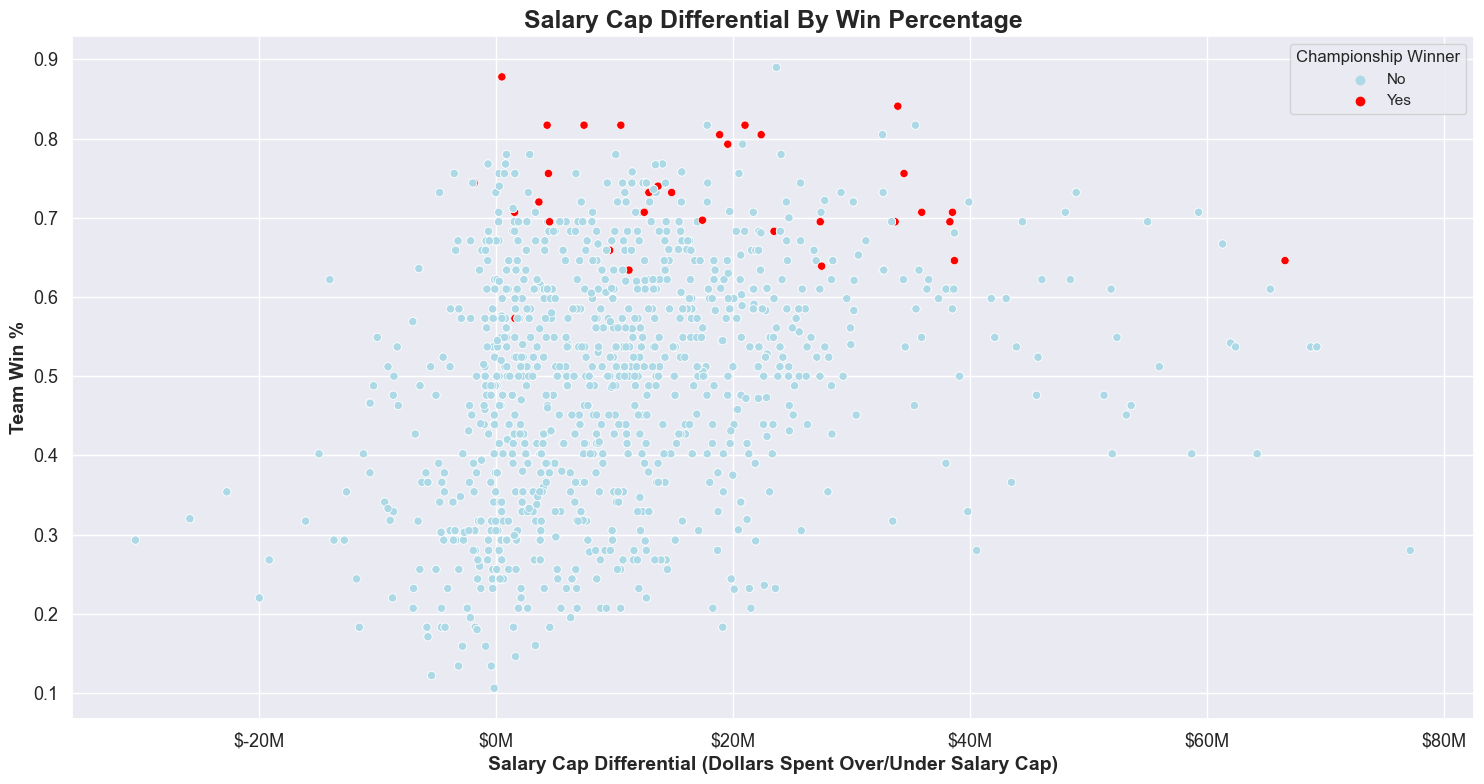

In [47]:
plt.figure(figsize=(15,8))

ax = sns.scatterplot(x = stats['diff_cap'], y = stats['w/l%'], hue = stats['won_championship'].map({1:'Yes', 0:'No'}), palette = ['lightblue', 'red'], s=35);
plt.title('Salary Cap Differential By Win Percentage', fontsize = 18, fontweight='bold')
plt.xlabel('Salary Cap Differential (Dollars Spent Over/Under Salary Cap)', fontsize=14, fontweight='bold')
plt.ylabel('Team Win %', fontsize=14, fontweight='bold')
plt.tick_params(axis='both', which='both', labelsize=13)
plt.legend(title = 'Championship Winner'); 

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/10**6:.0f}M'));

plt.tight_layout()
plt.savefig(f'../images/scatter_salcap_diff.png', dpi=300, bbox_inches='tight')
plt.show()

##### <span style = 'color:mediumvioletred'> _There is a general positive correlation between the salary cap differential (i.e., the difference between team payroll and the salary cap) and the season's win percentage. Many championship teams over the past 30 years exceeded the salary cap. However, a handful appear to have not exceeded it by much._ </span>

### Salary Distribution by All-NBA Selection

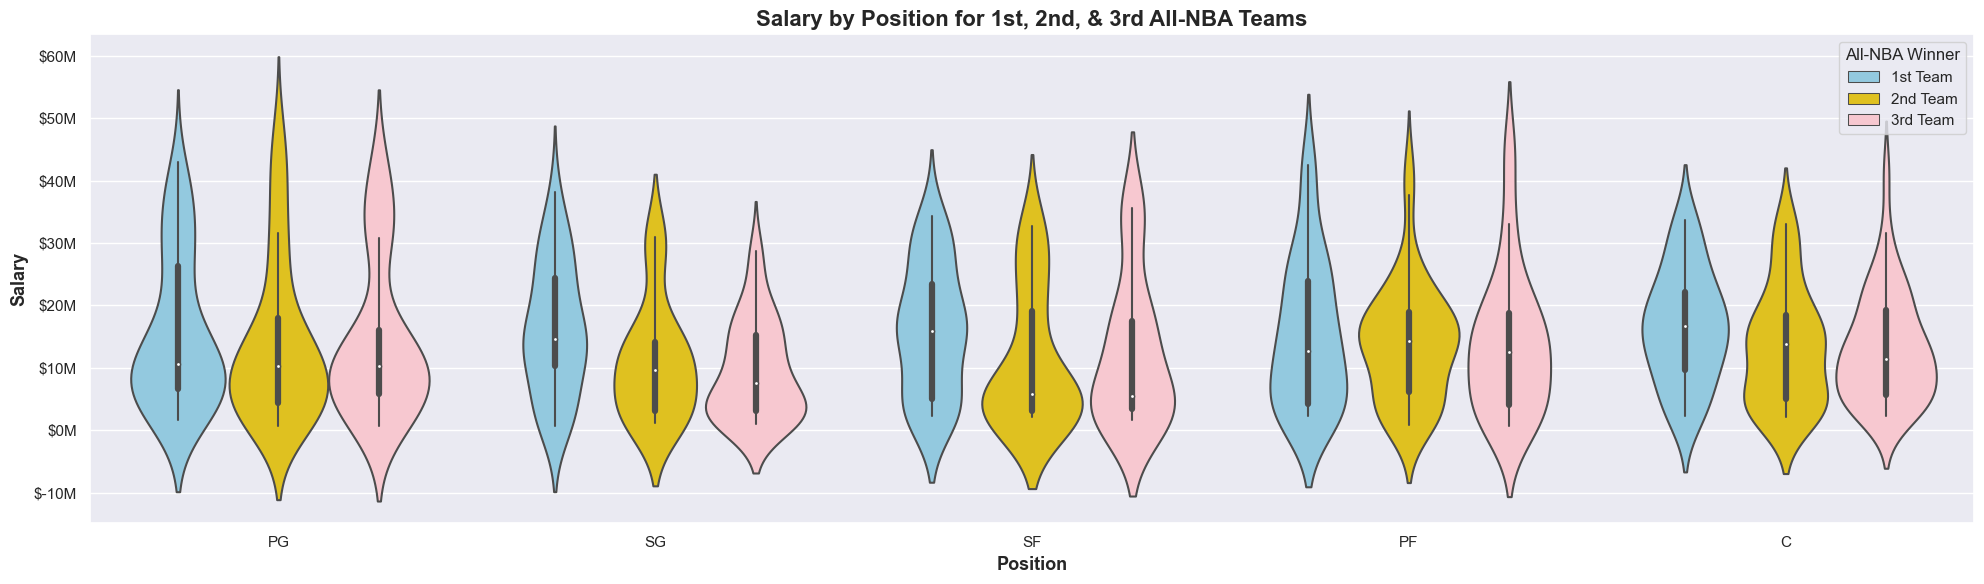

In [48]:
colors = ['skyblue', 'gold', 'pink', 'teal']

plt.figure(figsize=(20,6))
order = ['PG', 'SG', 'SF', 'PF', 'C']

ax=sns.violinplot(x="pos_5", y="salary", hue="all_nba_winner2", data=stats, order=order, palette=colors)

plt.title('Salary by Position for 1st, 2nd, & 3rd All-NBA Teams', fontweight='bold', fontsize=16) 
plt.xlabel('Position', fontweight='bold', fontsize=13) 
plt.ylabel('Salary', fontweight='bold', fontsize=13) 
legend = plt.gca().get_legend()
legend.set_title('All-NBA Winner');

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/10**6:.0f}M'));

plt.tight_layout()
plt.savefig(f'../images/scatter_salcap_diff.png', dpi=300, bbox_inches='tight')
plt.show()

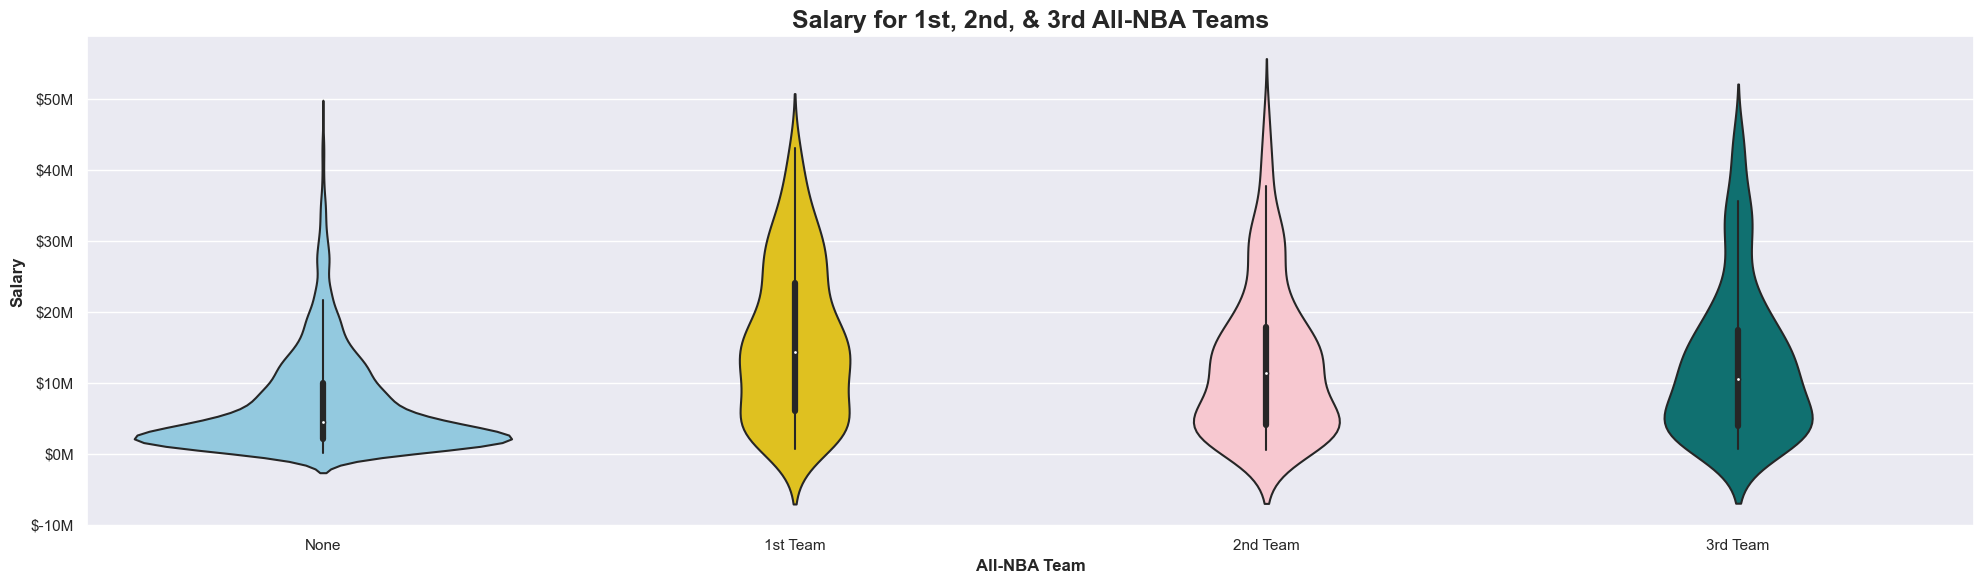

In [49]:
colors = ['skyblue', 'gold', 'pink', 'teal']

plt.figure(figsize=(20,6))

ax=sns.violinplot(x="all_nba_winner3", y="salary", data=stats, palette=colors)

plt.title('Salary for 1st, 2nd, & 3rd All-NBA Teams', fontweight='bold', fontsize=18) 
plt.xlabel('All-NBA Team', fontweight='bold') 
plt.ylabel('Salary', fontweight='bold') 
#legend = plt.gca().get_legend()
#legend.set_title('All-NBA Winner');

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/10**6:.0f}M'));

plt.tight_layout()
plt.savefig(f'../images/scatter_sal_allnba.png', dpi=300, bbox_inches='tight')
plt.show()

##### <span style = 'color:mediumvioletred'> _There does not appear to be a substantial salary difference, in general, between 1st vs. 2nd vs. 3rd All-NBA Teams. Making any All-NBA Team, however, does appear to be correlated with higher salary, as these players must be highly impactful and skilled to receive the selection as well as strong contracts. There still do appear to be players who do no make an All-NBA Team who have similar salaries to those who do.  ._ </span>

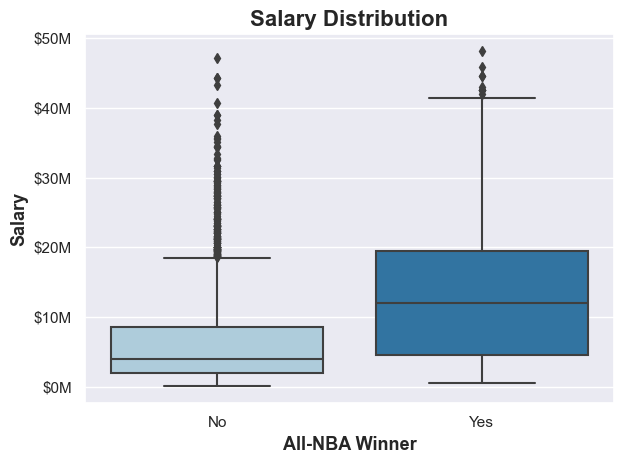

In [50]:
sns.set(style='darkgrid')
colors = 'Paired'
ax=sns.boxplot(x= stats['all_nba_winner'].map({0:'No', 1:'Yes', 2:'Yes', 3: 'Yes'}), y='salary', data=stats, palette=colors)
plt.title('Salary Distribution', fontsize=16, fontweight='bold')
plt.xlabel('All-NBA Winner', fontsize=13, fontweight='bold')
plt.ylabel('Salary', fontsize=13, fontweight='bold')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/10**6:.0f}M'));

plt.tight_layout()
plt.savefig(f'../images/box_sal_allnba.png', dpi=300, bbox_inches='tight')
plt.show()

##### <span style = 'color:mediumvioletred'> _All-NBA Winners have higher salaries on average than those who do not make an All-NBA Team. However, there appear to be numerous outliers in the left boxplot, indicating that even those who do not make the All-NBA Team are making an impact and have strong contracts. It is understandable that the best players would also have the highest salaries, though this can be demonstrated in other ways than being selected for All-NBA Teams._ </span>

### PER by Salary and All-NBA Selection

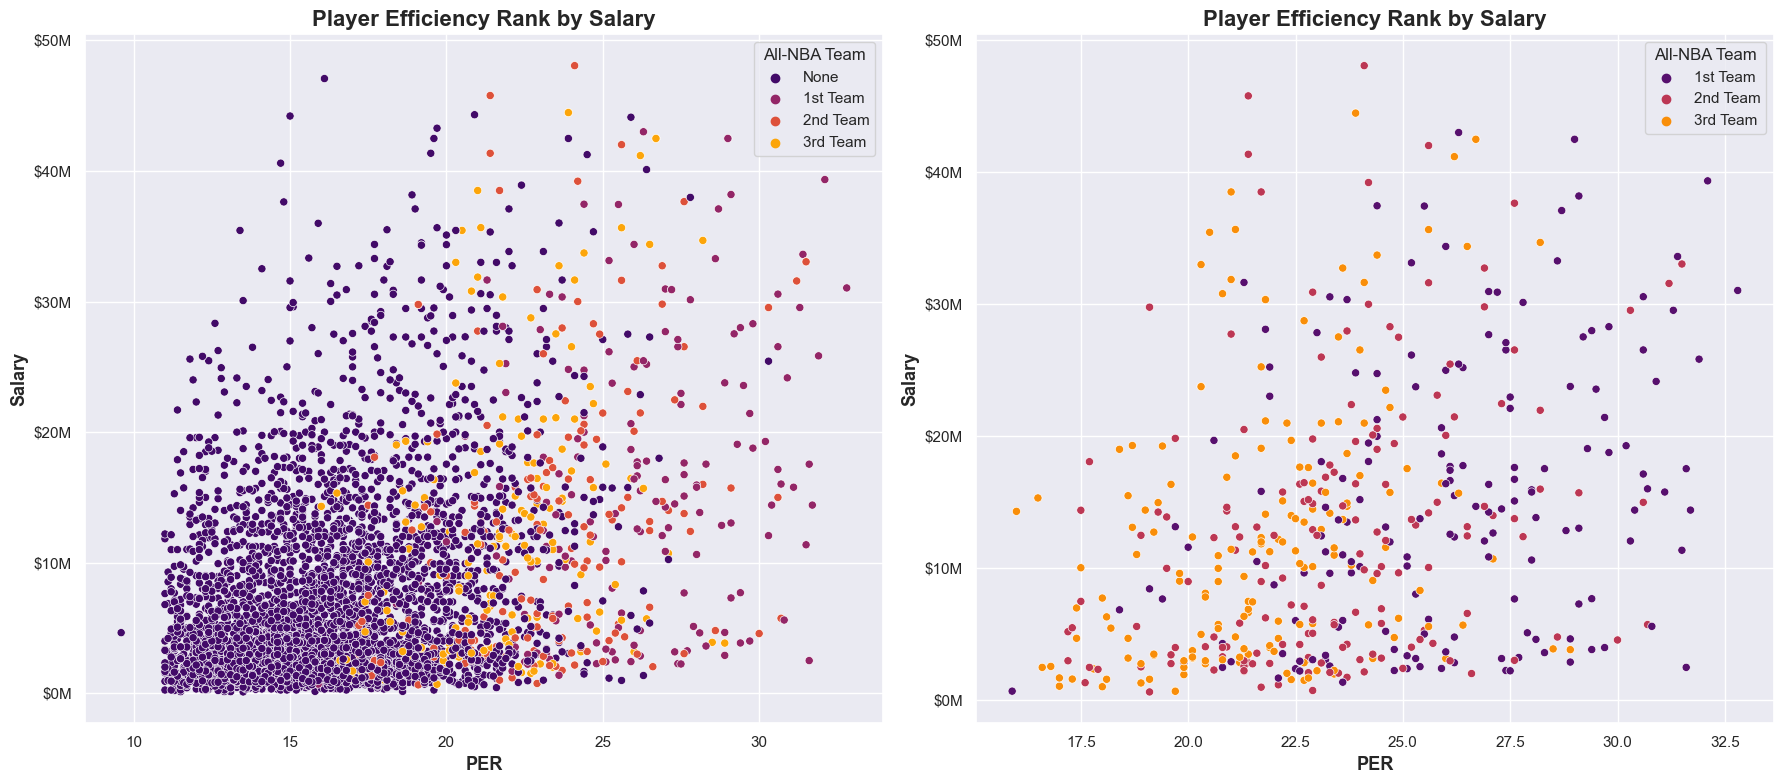

In [51]:
fig, ax = plt.subplots(1,2, figsize=(18,8))

ax[0] = sns.scatterplot(x = stats['adv_per'], y = stats['salary'], hue = stats['all_nba_winner3'], palette = 'inferno', s=35, ax=ax[0]);
ax[0].set_title('Player Efficiency Rank by Salary', fontsize = 16, fontweight='bold')
ax[0].set_xlabel('PER', fontsize=13, fontweight='bold')
ax[0].set_ylabel('Salary', fontsize=13, fontweight='bold')
#ax[0].legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = 'All-NBA Team'); 
ax[0].legend(title = 'All-NBA Team'); 
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/10**6:.0f}M'));

ax[1] = sns.scatterplot(x = stats['adv_per'], y = stats['salary'], hue = stats['all_nba_winner2'], palette = 'inferno', s=35, ax=ax[1]);
ax[1].set_title('Player Efficiency Rank by Salary', fontsize = 16, fontweight='bold')
ax[1].set_xlabel('PER', fontsize=13, fontweight='bold')
ax[1].set_ylabel('Salary', fontsize=13, fontweight='bold')
#ax[1].legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = 'All-NBA Team'); 
ax[1].legend(title = 'All-NBA Team'); 
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/10**6:.0f}M'));

plt.tight_layout()
plt.savefig(f'../images/scatter_sal_per.png', dpi=300, bbox_inches='tight')
plt.show()

##### <span style = 'color:mediumvioletred'> _Higher player efficiency translates to higher skill and impact during play, therefore, these highly efficient players have earned higher salaries. Generally, the 1st Team winners have the higher PERs, though there are a fair amount of 2nd Team and 3rd Team winners who have similar PERs to 1st Team winners._ </span>

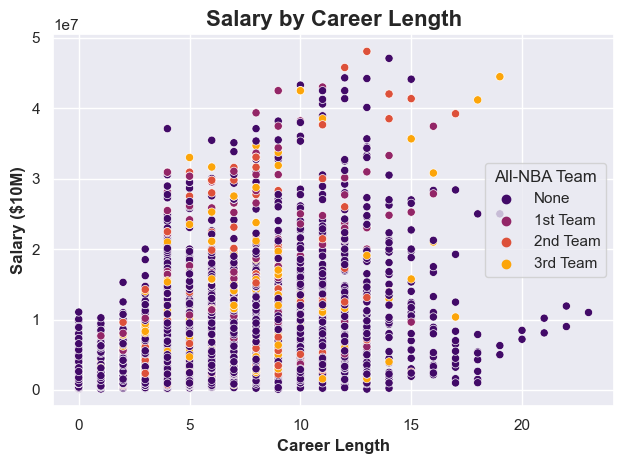

In [52]:
sns.scatterplot(x = stats['career_length'], y = stats['salary'], hue = stats['all_nba_winner3'], palette = 'inferno', s=35);

plt.title('Salary by Career Length', fontsize = 16, fontweight='bold')
plt.xlabel('Career Length', fontsize=12, fontweight='bold')
plt.ylabel('Salary ($10M)', fontsize=12, fontweight='bold')
plt.legend(title = 'All-NBA Team')
plt.tight_layout()
plt.show()

##### <span style = 'color:mediumvioletred'> _As may be suspected, salaries appear to be less in early careers, they peek towards the middle around the 8-12 year mark and then decreases players are later in their career where their roles and responsibilities are assumed to change._ </span>